In [7]:
%%capture
!pip install lightautoml

In [8]:
!pip install gdown

In [3]:
!gdown --id 1luhGPR0zWXCmVAsa5tA74e5z9FE63y3F

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.

  warnings.warn(

Downloading...

From: https://drive.google.com/uc?id=1luhGPR0zWXCmVAsa5tA74e5z9FE63y3F

To: /notebooks/big_df.csv

100%|██████████████████████████████████████| 1.48G/1.48G [00:21<00:00, 67.8MB/s]


In [4]:
!gdown --id 1IwFMbWJNUU1G-UkbjpOAq8jAYpCZrLfM

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.

  warnings.warn(

Downloading...

From: https://drive.google.com/uc?id=1IwFMbWJNUU1G-UkbjpOAq8jAYpCZrLfM

To: /notebooks/train_clusters.csv

100%|██████████████████████████████████████| 62.0M/62.0M [00:00<00:00, 64.9MB/s]


In [5]:
!gdown --id 1mM1Jt3HcwfEx6lVsqbwHiVFQJuW28WV6

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.

  warnings.warn(

Downloading...

From: https://drive.google.com/uc?id=1mM1Jt3HcwfEx6lVsqbwHiVFQJuW28WV6

To: /notebooks/PIndx20.csv

100%|██████████████████████████████████████| 7.70M/7.70M [00:00<00:00, 61.5MB/s]


In [6]:
!gdown --id 1qko7C-EEk1Smf9dB46iSc7DU5kEKIp87

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.

  warnings.warn(

Downloading...

From: https://drive.google.com/uc?id=1qko7C-EEk1Smf9dB46iSc7DU5kEKIp87

To: /notebooks/test_dataset_test.csv

100%|████████████████████████████████████████| 656M/656M [00:08<00:00, 74.0MB/s]


In [7]:
!gdown --id 14mCgEKtF_Z-p6qLkvs-ovM1WtilHy_N-

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.

  warnings.warn(

Downloading...

From: https://drive.google.com/uc?id=14mCgEKtF_Z-p6qLkvs-ovM1WtilHy_N-

To: /notebooks/test_clusters.csv

100%|██████████████████████████████████████| 40.9M/40.9M [00:00<00:00, 47.5MB/s]


In [9]:
#### ALALLLALA
!gdown --id 1zJeYlt2euRSJi_C25BGyu5LmO1pxPwJt

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1zJeYlt2euRSJi_C25BGyu5LmO1pxPwJt
To: /notebooks/all_big.csv
100%|██████████████████████████████████████| 3.59G/3.59G [00:52<00:00, 67.9MB/s]


In [10]:
!gdown --id 1nUNXbmncyEaimwlhOXpIlhsh8f-MLoEd

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1nUNXbmncyEaimwlhOXpIlhsh8f-MLoEd
To: /notebooks/label.csv
100%|██████████████████████████████████████| 58.9M/58.9M [00:00<00:00, 77.5MB/s]


In [11]:

# Standard python libraries
import os
import time

# Essential DS libraries
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import torch

# LightAutoML presets, task and report generation
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task


In [12]:

pd.set_option('display.max_columns', None)

# ALL DATA

# Part2


In [13]:
all_df = pd.read_csv('./all_big.csv')

In [14]:
label = pd.read_csv('./label.csv')

In [5]:
####


In [6]:
#mean = all_df.drop(['total_price'],axis = 1).merge(all_df[['CITY','total_price']].groupby('CITY').aggregate('mean'), how = 'left',on='CITY').fillna(0)['total_price']
#std = all_df.drop(['total_price'],axis = 1).merge(all_df[['CITY','total_price']].groupby('CITY').aggregate('std'), how = 'left',on='CITY').fillna(1)['total_price']
#(all_df['total_price'] - mean)/std

In [15]:
for col in ['CITY','type']:
    for feat in ['net_weight','weight_mfi','transport_pay','total_price','weight','delta_qty_log','w/p']:
        mean = all_df[[col]].merge(all_df[[col,feat]].groupby(col).aggregate('mean'), how = 'left',on=col).fillna(0)[feat]
        std = all_df[[col]].merge(all_df[[col,feat]].groupby(col).aggregate('std'), how = 'left',on=col).fillna(1)[feat]
        all_df[f'{feat}_{col}'] = (all_df[feat] - mean)/std
        print(col,feat)

CITY net_weight
CITY weight_mfi
CITY transport_pay
CITY total_price
CITY weight
CITY delta_qty_log
CITY w/p
type net_weight
type weight_mfi
type transport_pay
type total_price
type weight
type delta_qty_log
type w/p


In [16]:
all_df.drop(['op_t','op_a','Unnamed: 0'],axis = 1,inplace = True)#all_df.drop(['op_t','op_a','Unnamed: 0'],axis = 1,inplace = True)

In [17]:
all_df.drop(['mobile_f', 'AREA', 'post_days', 'num_prod', 'mail%0', 'mail%-1', 'tech_f', 'accses_f', 'man_f',
       'cloth_f', 'child_f', 'is_0_mfi'],axis = 1,inplace = True)

In [18]:
qty_cols = ['total_qty_over_index','total_qty_over_index_and_type','total_qty_oper_login_0','total_qty_oper_login_1','dist_qty_oper_login_1']
for i in range(5):
    for j in range(i+1,5):
        if (not (i==3 and j==4)) and (not (i ==2  and j==3)) and (not (i == 0 and j == 1)):
            all_df[f'delta_{i}_{j}'] =  (all_df[qty_cols[i]] - all_df[qty_cols[j]])
            all_df[f'div{i}_{j}'] =  np.log(all_df[qty_cols[i]]+1) - np.log(all_df[qty_cols[j]]+1)
            print(i,j)

0 2
0 3
0 4
1 2
1 3
1 4
2 4


In [13]:
all_df

,id,type,weight,mailctg,mailrank,transport_pay,postmark,weight_mfi,price_mfi,dist_qty_oper_login_1,total_qty_oper_login_1,total_qty_oper_login_0,total_qty_over_index_and_type,total_qty_over_index,is_wrong_phone_number,CITY,net_weight,total_price,rel_price,w/p,w*p,delta_log1,delta_qty_log,delta_bigi,cluster,mail%1,delta_qty_log.MODE(univer.type),delta_bigi.COUNT(univer),total_qty_over_index.COUNT(univer),mailctg.MODE(univer.type),net_weight_CITY,weight_mfi_CITY,transport_pay_CITY,total_price_CITY,weight_CITY,delta_qty_log_CITY,w/p_CITY,net_weight_type,weight_mfi_type,transport_pay_type,total_price_type,weight_type,delta_qty_log_type,w/p_type,delta_0_2,div0_2,delta_0_3,div0_3,delta_0_4,div0_4,delta_1_2,div1_2,delta_1_3,div1_3,delta_1_4,div1_4,delta_2_4,div2_4
0,6818780,Участок,87.0,1.0,0.0,0.00,0.0,41.0,150.0,42.0,720176.0,58950.0,779126.0,8290896.0,0,НИЖНЕВАРТОВСК,46.0,150.00,5.017280,-1.279610,8.724370,9.726052,661226.0,7511770.0,22,0.866575,Участок,3327,3327,Цех,-0.076116,-0.419407,-0.335401,-0.286444,-0.365319,1.022227,-0.461740,-0.174118,-0.379597,-0.607445,-0.146689,-0.316172,0.185897,-0.523388,8231946.0,4.946207,7570720.0,2.443416,8290854.0,12.169469,720176.0,2.581467,58950.0,0.078677,779084.0,9.804729,58908.0,7.223262
1,9907176,ММПО,107.0,1.0,0.0,0.00,0.0,68.0,400.0,914.0,48856658.0,83318932.0,132175590.0,136819803.0,0,ШАРАПОВО,39.0,400.00,5.993961,-1.759855,10.211009,10.885477,-34462274.0,4644213.0,3,0.718259,ММПО,1326089,1326089,Цех,-0.156931,-0.250346,-0.427019,-0.039767,-0.294781,-0.389147,-0.778084,-0.169745,-0.193554,-0.409950,-0.001004,-0.264943,0.247307,-0.797613,53500871.0,0.495989,87963145.0,1.029774,136818889.0,11.915251,48856658.0,0.461455,83318932.0,0.995241,132174676.0,11.880718,83318018.0,11.419262
2,3304275,Цех,50.0,1.0,0.0,0.00,0.0,56.0,218.0,62.0,3246292.0,3233068.0,6479360.0,52708071.0,0,ЕКАТЕРИНБУРГ,-6.0,218.00,5.389072,-1.346020,9.409929,10.849890,13224.0,46228711.0,14,0.997013,Цех,44459,44470,Цех,-0.480741,-0.033910,-0.799821,0.084685,-0.471495,0.220909,-0.933091,-0.298638,-0.371463,-0.577715,-0.138001,-0.461548,-1.033472,-0.475905,49475003.0,2.791337,49461779.0,2.787255,52708009.0,13.637144,3246292.0,0.695190,3233068.0,0.691108,6479298.0,11.540998,3233006.0,10.845808
3,9020937,Цех,416.0,1.0,0.0,35.34,0.0,33.0,100.0,55.0,2060928.0,653280.0,2714208.0,19562334.0,0,РОСТОВ-НА-ДОНУ,383.0,135.34,1.022201,-1.088760,8.101981,10.513316,1407648.0,16848126.0,26,0.989267,Цех,3905,3905,Цех,0.787941,-0.349227,0.965470,-0.107502,0.573516,-0.379433,-0.308558,0.582326,-0.470145,0.957727,-0.171124,0.311769,-0.988666,-0.225697,18909054.0,3.399354,17501406.0,2.250449,19562279.0,12.763765,2060928.0,1.424248,653280.0,0.275344,2714153.0,10.788659,653225.0,9.364411
4,3082311,Участок,795.0,1.0,0.0,52.52,0.0,716.0,1000.0,16.0,316919.0,27911.0,344830.0,4719186.0,0,НОЯБРЬСК,79.0,1052.52,2.928699,-0.333679,13.481437,9.833191,289008.0,4374356.0,17,0.941481,Участок,2088,2088,Цех,-0.315718,3.035770,1.562205,1.482914,1.199923,0.601363,0.365681,-0.107255,2.947229,1.786965,0.398764,1.057525,0.115706,0.450095,4691275.0,5.130335,4402267.0,2.700742,4719170.0,12.533934,316919.0,2.513998,27911.0,0.084405,344814.0,9.917596,27895.0,7.403599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,9030800,ГОПС,53.0,1.0,0.0,0.00,0.0,61.0,262.0,3.0,4297.0,1803.0,6100.0,64613.0,0,АБАКАН,-8.0,262.00,5.572154,-1.445020,9.679281,6.979611,2494.0,58513.0,26,0.941176,ГОПС,62,62,Цех,-0.544567,-0.249412,-0.681133,-0.093658,-0.661968,-2.376837,-0.872845,-0.270417,-0.278235,-0.533199,-0.084987,-0.374225,-0.464746,-0.618053,62810.0,3.578425,60316.0,2.710281,64610.0,9.689892,4297.0,1.218446,1803.0,0.350303,6097.0,7.329914,1800.0,6.111467
9999996,6275048,ММПО,286.0,1.0,0.0,32.05,0.0,0.0,0.0,914.0,48856658.0,83318932.0,132175590.0,136819803.0,0,ШАРАПОВО,286.0,32.05,-3.498022

In [22]:
#main_cols = ['id','rel_price','transport_pay','w*p','w/p','mailctg','type','div0_2','weight', 'delta_0_3','delta_qty_log','net_weight','div0_4',       'is_wrong_phone_number', 'delta_1_2', 'delta_0_2',
#       'total_price_type', 'price_mfi', 'weight_type', 'div1_4',]#'transport_pay','type','mailctg','total_qty_oper_login_0','total_qty_oper_login_1','total_qty_over_index','delta_qty_log','delta_bigi','delta_log1']

In [23]:
gen_df = all_df[main_cols]

In [25]:
!pip install featuretools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 506.4/506.4 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 918.2/918.2 kB 60.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 kB 70.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.5/139.5 kB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.5/427.5 kB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 kB 80.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.7/221.7 kB 62.3 MB/s eta 0:00:00
  Attempting uninstall: tornado
    Found existing installation: tornado 6.2
    Uninstalling tornado-6.2:
    

In [26]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import featuretools as ft
from featuretools.primitives import *


from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression, LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import explained_variance_score
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel, SelectKBest, RFE, chi2

# model tuning
#from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval

import warnings
warnings.filterwarnings("ignore")

In [38]:

import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

def make_bucket(df,feature, n =  100):
    '''функция, бьющая на бакеты(по умолчанию 100 точек)'''
    return df.assign(bucket = np.ceil(df[feature].rank(pct = True) * n))

from sklearn.metrics import roc_auc_score,r2_score
from sklearn.linear_model import LogisticRegression

def fit_predict1(X_train, y_train, X_test, global_woe):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    prediction = model.predict_proba(X_train)
    return prediction, model.intercept_, model.coef_


def woe_val(tar, global_woe, iv, g_t, g_f):
    woe = np.log((sum(tar)) / (tar.shape[0] - sum(tar) + 1)) - global_woe
    iv += woe * ((sum(tar) / g_t) - (tar.shape[0] - sum(tar)) / g_f)
    return woe, iv


def woe_line(x, y, n_buckets):  #mid how target feature_name, target_name
    """ Строит график зависимости WoE
    x - параметр, от которого стоит искать зависимость
    y - метки класса (0 / 1)
    n_buckets - количество бинов для вещественного признака
    feature_name, target_name - подписи к графику
    """
    ind = np.argsort(x.reshape(-1))
    size = len(x) // n_buckets
    grouped = []
    med_var = []
    mini = []
    maxi = []
    woe = []
    iv = 0
    df = pd.DataFrame()
    df['tar'] = y
    df['var'] = x
    df = make_bucket(df, 'var', n_buckets)

    g_t = sum(y)
    g_f = y.shape[0] - g_t

    new_nbins = df['bucket'].nunique()
    
    global_woe = np.log(
        (sum(df['tar'].values)) / (df['tar'].shape[0] - sum(df['tar'].values) + 1))
    
    bucks = np.sort(df['bucket'].unique())
    

    for t in bucks:
        mini.append(np.min(df['var'][df['bucket'] == t]))
        maxi.append(np.max(df['var'][df['bucket'] == t]))
        med_var.append(np.median(df['var'][df['bucket'] == t]))
        w, iv = woe_val(df['tar'][df['bucket'] == t].values, global_woe,
                        iv, g_t, g_f)
        woe.append(w)
        df['bucket'] = df['bucket'].replace(
            t, f"{round(mini[-1],3)}...{round(maxi[-1])}")

    alpha = (med_var[-1] - med_var[0]) / 100

    pred, inter, coef = fit_predict1(
        x, y,
        np.array([med_var[0] - 5 * alpha] + med_var +
                 [med_var[-1] + 5 * alpha]).reshape(-1, 1), global_woe)

    plt.figure(figsize=(15, 7))

    plt.grid()
    plt.plot(med_var, woe, 'o', color='red')
    line_tar = plt.plot(med_var, woe, color='red', linestyle='--', label="Woe")

    log_reg1 = plt.plot([med_var[0], med_var[-1]], [
        med_var[0] * coef[0] + inter - global_woe,
        med_var[-1] * coef[0] + inter - global_woe
    ],
                        label="Interpolation")

    plt.legend(fontsize=12,
               loc='lower right',
               fancybox=True,
               framealpha=1,
               shadow=True)
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()

    print("IV : ", round(iv, 4))
    print("AUC : ", round(roc_auc_score(y, pred[:, 1]), 4))
    print("n_buckets :", n_buckets)
    print("The point where woe is zero : ",
          round(((global_woe - inter) / coef[0])[0], 4))
    print("R_sqr : ", round(r2_score(woe,list(map(lambda x: coef[0]*x + inter - global_woe, med_var))),4))
    
    plt.xlabel("Feature", fontsize=20)
    plt.ylabel("WoE", fontsize=20)
    plt.grid()
    plt.show()

    fig = px.histogram(df, x='var', y='tar', color='bucket')
    fig.show()

def lo_sb(x):
    return np.sign(x)*np.log(abs(x)+1)


In [39]:
all_df['w/p_CITY'] = (all_df['w/p_CITY'].clip(lower=-3, upper=3))
all_df['mailctg'] = all_df['mailctg'].astype('str')
all_df['delta_bigi.COUNT(univer)'] = np.log(all_df['delta_bigi.COUNT(univer)'])
all_df['weight'] = np.log(all_df['weight']+1)
all_df['delta_0_3'] = np.log(all_df['delta_0_3']+1)
all_df['delta_qty_log'] = lo_sb(all_df['delta_qty_log'].clip(-5216249,6753334))
all_df['total_qty_over_index.COUNT(univer)'] = np.log(all_df['total_qty_over_index.COUNT(univer)'].clip(1,500000))
all_df['delta_qty_log'] = all_df['delta_qty_log'].clip(-100,1000)
all_df['net_weight'] = np.abs(lo_sb(all_df['net_weight'].clip(-100,1000))).values
all_df['total_price_CITY'] = all_df['total_price_CITY'].fillna(0).clip(-1,1)
all_df['div0_4'] = all_df['div0_4'].clip(0,12)
all_df['net_weight_CITY'] = all_df['net_weight_CITY'].fillna(0).clip(-5,5)
all_df['delta_1_2'] = make_bucket(all_df[['delta_1_2']],'delta_1_2')['bucket']
all_df['delta_0_2'] = make_bucket(all_df[['delta_0_2']],'delta_0_2')['bucket']
all_df['total_price_type'] = all_df['total_price_type'].clip(-2,2)
all_df['price_mfi'] = all_df['price_mfi'].clip(0,1500)
all_df['weight_type'] = np.sqrt(all_df['weight_type'].fillna(0).clip(-0.7,2)+0.7)
all_df['cluster'] = all_df['cluster'].astype('str')
all_df['div1_4'] = all_df['div1_4'].fillna(0).clip(5,11)
all_df['transport_pay_CITY'] = all_df['transport_pay_CITY'].fillna(0).clip(-1,3)
all_df['transport_pay_type'] = all_df['transport_pay_type'].fillna(0).clip(-0.5,4)
all_df['delta_qty_log_type'] = all_df['delta_qty_log_type'].fillna(0).clip(-2,2)
all_df['net_weight_type'] = all_df['net_weight_type'].fillna(0).clip(-2,2)
all_df['weight_mfi_CITY'] = all_df['weight_mfi_CITY'].fillna(0).clip(-1,3)
all_df['w/p_type'] = all_df['w/p_type'].fillna(0).clip(-3,3)
all_df['weight_CITY'] = np.log(all_df['weight_CITY'].fillna(0).clip(-1,2) +2)
all_df['w/p'] = all_df['w/p'].fillna(0).clip(-3,2)
all_df['div0_3'] = all_df['div0_3'].fillna(0).clip(0,4)
all_df['delta_qty_log_CITY'] = all_df['delta_qty_log_CITY'].fillna(0).clip(-3,3)

In [53]:
main_cols =  ['id','transport_pay','type','mailctg','rel_price', 'w*p','w/p','div0_2','weight','delta_0_3', 'delta_qty_log','net_weight','weight_type','div0_4','is_wrong_phone_number','delta_1_2','CITY']
gen_df = all_df[main_cols]

In [54]:
from woodwork.logical_types import Categorical, Double, Integer
es = ft.EntitySet()
es = es.add_dataframe(
    dataframe_name="univer",
    dataframe=gen_df,
    index="id",
    logical_types=   {
                                  'transport_pay': Double,
                                    'type': Categorical,
                                    'mailctg': Categorical,
                                    
                                    'rel_price': Double,
        'w*p': Double,
        'w/p': Double,
        'div0_2': Double,
        'weight': Double,
        'delta_0_3': Double,
        'delta_qty_log': Double,
        'net_weight':Double,
        'div0_4':Double,
        'is_wrong_phone_number':Categorical,
        'CITY':Categorical
        
        
               }
)

In [55]:
es = es.normalize_dataframe(base_dataframe_name='univer', new_dataframe_name='transport_pay', index='transport_pay')
es = es.normalize_dataframe(base_dataframe_name='univer', new_dataframe_name='type', index='type')
es = es.normalize_dataframe(base_dataframe_name='univer', new_dataframe_name='mailctg', index='mailctg')
es = es.normalize_dataframe(base_dataframe_name='univer', new_dataframe_name='rel_price', index='rel_price')
es = es.normalize_dataframe(base_dataframe_name='univer', new_dataframe_name='w*p', index='w/p')
es = es.normalize_dataframe(base_dataframe_name='univer', new_dataframe_name='div0_2', index='div0_2')
es = es.normalize_dataframe(base_dataframe_name='univer', new_dataframe_name='delta_qty_log', index='delta_qty_log')
es = es.normalize_dataframe(base_dataframe_name='univer', new_dataframe_name='weight', index='weight')
es = es.normalize_dataframe(base_dataframe_name='univer', new_dataframe_name='delta_0_3', index='delta_0_3')
es = es.normalize_dataframe(base_dataframe_name='univer', new_dataframe_name='net_weight', index='net_weight')
es = es.normalize_dataframe(base_dataframe_name='univer', new_dataframe_name='div0_4', index='div0_4')
es = es.normalize_dataframe(base_dataframe_name='univer', new_dataframe_name='is_wrong_phone_number', index='is_wrong_phone_number')
es = es.normalize_dataframe(base_dataframe_name='univer', new_dataframe_name='CITY', index='CITY')
#es = es.normalize_dataframe(base_dataframe_name='univer', new_dataframe_name='tr_count_группы', index='tr_count_группы')
es

Entityset: None
  DataFrames:
    univer [Rows: 10000000, Columns: 17]
    transport_pay [Rows: 10469, Columns: 1]
    type [Rows: 20, Columns: 1]
    mailctg [Rows: 5, Columns: 1]
    rel_price [Rows: 91205, Columns: 1]
    w*p [Rows: 106952, Columns: 1]
    div0_2 [Rows: 43752, Columns: 1]
    delta_qty_log [Rows: 17097, Columns: 1]
    weight [Rows: 2817, Columns: 1]
    delta_0_3 [Rows: 35708, Columns: 1]
    net_weight [Rows: 1001, Columns: 1]
    div0_4 [Rows: 36296, Columns: 1]
    is_wrong_phone_number [Rows: 2, Columns: 1]
    CITY [Rows: 10920, Columns: 1]
  Relationships:
    univer.transport_pay -> transport_pay.transport_pay
    univer.type -> type.type
    univer.mailctg -> mailctg.mailctg
    univer.rel_price -> rel_price.rel_price
    univer.w/p -> w*p.w/p
    univer.div0_2 -> div0_2.div0_2
    univer.delta_qty_log -> delta_qty_log.delta_qty_log
    univer.weight -> weight.weight
    univer.delta_0_3 -> delta_0_3.delta_0_3
    univer.net_weight -> net_weight.net_weight


In [56]:
primitives = ft.list_primitives()
pd.options.display.max_colwidth = 100
primitives[primitives['type'] == 'aggregation'].head(primitives[primitives['type'] == 'aggregation'].shape[0])

,name,type,dask_compatible,spark_compatible,description,valid_inputs,return_type
0,avg_time_between,aggregation,False,False,Computes the average number of seconds between consecutive events.,<ColumnSchema (Logical Type = Datetime) (Semantic Tags = ['time_index'])>,<ColumnSchema (Logical Type = Double) (Semantic Tags = ['numeric'])>
1,time_since_last,aggregation,False,False,Calculates the time elapsed since the last datetime (default in seconds).,<ColumnSchema (Logical Type = Datetime) (Semantic Tags = ['time_index'])>,<ColumnSchema (Logical Type = Double) (Semantic Tags = ['numeric'])>
2,count_below_mean,aggregation,False,False,Determines the number of values that are below the mean.,<ColumnSchema (Semantic Tags = ['numeric'])>,<ColumnSchema (Logical Type = IntegerNullable) (Semantic Tags = ['numeric'])>
3,count_outside_nth_std,aggregation,False,False,Determines the number of observations that lie outside the first N standard deviations.,<ColumnSchema (Semantic Tags = ['numeric'])>,<ColumnSchema (Logical Type = Integer) (Semantic Tags = ['numeric'])>
4,count_outside_range,aggregation,False,False,Determines the number of values that fall outside a certain range.,<ColumnSchema (Semantic Tags = ['numeric'])>,<ColumnSchema (Logical Type = IntegerNullable) (Semantic Tags = ['numeric'])>
5,skew,aggregation,False,False,Computes the extent to which a distribution differs from a normal distribution.,<ColumnSchema (Semantic Tags = ['numeric'])>,<ColumnSchema (Semantic Tags = ['numeric'])>
6,mean,aggregation,True,True,Computes the average for a list of values.,<ColumnSchema (Semantic Tags = ['numeric'])>,<ColumnSchema (Semantic Tags = ['numeric'])>
7,all,aggregation,True,False,Calculates if all values are 'True' in a list.,"<ColumnSchema (Logical Type = BooleanNullable)>, <ColumnSchema (Logical Type = Boolean)>",<ColumnSchema (Logical Type = Boolean)>
8,any,aggregation,True,False,Determines if any value is 'True' in a list.,"<ColumnSchema (Logical Type = BooleanNullable)>, <ColumnSchema (Logical Type = Boolean)>",<ColumnSchema (Logical Type = Boolean)>
9,time_since_first,aggregation,False,False,Calculates the time elapsed since the first datetime (in seconds).,<ColumnSchema (Logical Type = Datetime) (Semantic Tags = ['time_index'])>,<ColumnSchema (Logical Type = Double) (Semantic Tags = ['numeric'])>


In [57]:
features, feature_names = ft.dfs(entityset = es, 
                                 target_dataframe_name = 'univer', 
                                 max_depth = 4)

In [58]:
len(feature_names)

359

In [15]:
#all_df1 = all_df

In [16]:
#all_df['w/p_CITY'] = (all_df['w/p_CITY'].clip(lower=-3, upper=3))
#all_df['mailctg'] = all_df['mailctg'].astype('str')
#all_df['delta_bigi.COUNT(univer)'] = np.log(all_df['delta_bigi.COUNT(univer)'])
#all_df['weight'] = np.log(all_df['weight']+1)
#all_df['delta_0_3'] = np.log(all_df['delta_0_3']+1)
#all_df['delta_qty_log'] = lo_sb(all_df['delta_qty_log'].clip(-5216249,6753334))
#all_df['total_qty_over_index.COUNT(univer)'] = np.log(all_df['total_qty_over_index.COUNT(univer)'].clip(1,500000))
#all_df['delta_qty_log'] = all_df['delta_qty_log'].clip(-100,1000)
#all_df['net_weight'] = np.abs(lo_sb(all_df['net_weight'].clip(-100,1000))).values
#all_df['total_price_CITY'] = all_df['total_price_CITY'].fillna(0).clip(-1,1)
#all_df['div0_4'] = all_df['div0_4'].clip(0,12)
#all_df['net_weight_CITY'] = all_df['net_weight_CITY'].fillna(0).clip(-5,5)
#all_df['delta_1_2'] = make_bucket(all_df[['delta_1_2']],'delta_1_2')['bucket']
#all_df['delta_0_2'] = make_bucket(all_df[['delta_0_2']],'delta_0_2')['bucket']
#all_df['total_price_type'] = all_df['total_price_type'].clip(-2,2)
#all_df['price_mfi'] = all_df['price_mfi'].clip(0,1500)
#all_df['weight_type'] = np.sqrt(all_df['weight_type'].fillna(0).clip(-0.7,2)+0.7)
#all_df['cluster'] = all_df['cluster'].astype('str')
#all_df['div1_4'] = all_df['div1_4'].fillna(0).clip(5,11)
#all_df['transport_pay_CITY'] = all_df['transport_pay_CITY'].fillna(0).clip(-1,3)
#all_df['transport_pay_type'] = all_df['transport_pay_type'].fillna(0).clip(-0.5,4)
#all_df['delta_qty_log_type'] = all_df['delta_qty_log_type'].fillna(0).clip(-2,2)
#all_df['net_weight_type'] = all_df['net_weight_type'].fillna(0).clip(-2,2)
#all_df['weight_mfi_CITY'] = all_df['weight_mfi_CITY'].fillna(0).clip(-1,3)
#all_df['w/p_type'] = all_df['w/p_type'].fillna(0).clip(-3,3)
#all_df['weight_CITY'] = np.log(all_df['weight_CITY'].fillna(0).clip(-1,2) +2)
#all_df['w/p'] = all_df['w/p'].fillna(0).clip(-3,2)
#all_df['div0_3'] = all_df['div0_3'].fillna(0).clip(0,4)
#all_df['delta_qty_log_CITY'] = all_df['delta_qty_log_CITY'].fillna(0).clip(-3,3)



In [63]:
all_df_bigi = pd.concat([all_df,features[set(list((features.columns))) - set(list(all_df.columns))]],axis = 1) 

In [68]:
all_df_bigi

,id,type,weight,mailctg,mailrank,transport_pay,postmark,weight_mfi,price_mfi,dist_qty_oper_login_1,total_qty_oper_login_1,total_qty_oper_login_0,total_qty_over_index_and_type,total_qty_over_index,is_wrong_phone_number,CITY,net_weight,total_price,rel_price,w/p,w*p,delta_log1,delta_qty_log,delta_bigi,cluster,mail%1,delta_qty_log.MODE(univer.type),delta_bigi.COUNT(univer),total_qty_over_index.COUNT(univer),mailctg.MODE(univer.type),net_weight_CITY,weight_mfi_CITY,transport_pay_CITY,total_price_CITY,weight_CITY,delta_qty_log_CITY,w/p_CITY,net_weight_type,weight_mfi_type,transport_pay_type,total_price_type,weight_type,delta_qty_log_type,w/p_type,delta_0_2,div0_2,delta_0_3,div0_3,delta_0_4,div0_4,delta_1_2,div1_2,delta_1_3,div1_3,delta_1_4,div1_4,delta_2_4,div2_4,delta_0_3.MIN(univer.weight_type),div0_2.NUM_UNIQUE(univer.is_wrong_phone_number),delta_qty_log.NUM_UNIQUE(univer.CITY),w*p.MAX(univer.w*p),net_weight.MEAN(univer.weight_type),net_weight.NUM_UNIQUE(univer.type),w*p.MIN(univer.delta_1_2),div0_4.NUM_UNIQUE(univer.is_wrong_phone_number),type.MEAN(univer.w*p),weight.SKEW(univer.weight_type),div0_4.MIN(univer.delta_1_2),div0_4.STD(univer.weight_type),mailctg.NUM_UNIQUE(univer.type),w*p.NUM_UNIQUE(univer.type),is_wrong_phone_number.SKEW(univer.weight_type),CITY.MIN(univer.delta_1_2),CITY.COUNT(univer),transport_pay.MAX(univer.delta_1_2),is_wrong_phone_number.MODE(univer.type),is_wrong_phone_number.MIN(univer.weight_type),net_weight.MIN(univer.w*p),div0_2.COUNT(univer),CITY.NUM_UNIQUE(univer.type),is_wrong_phone_number.SUM(univer.w*p),weight.SUM(univer.delta_1_2),delta_0_3.MIN(univer.w*p),weight.NUM_UNIQUE(univer.type),div0_2.STD(univer.delta_1_2),CITY.MAX(univer.weight_type),w*p.NUM_UNIQUE(univer.is_wrong_phone_number),delta_qty_log.STD(univer.w*p),div0_4.SKEW(univer.w*p),rel_price.NUM_UNIQUE(univer.type),transport_pay.NUM_UNIQUE(univer.CITY),rel_price.SUM(univer.delta_1_2),div0_2.MEAN(univer.delta_1_2),net_weight.STD(univer.weight_type),type.SKEW(univer.delta_1_2),w*p.MEAN(univer.weight_type),div0_4.NUM_UNIQUE(univer.mailctg),CITY.STD(univer.delta_1_2),weight.SUM(univer.weight_type),div0_2.MEAN(univer.weight_type),div0_2.STD(univer.weight_type),transport_pay.MIN(univer.weight_type),w*p.MAX(univer.weight_type),rel_price.MAX(univer.delta_1_2),div0_4.SUM(univer.weight_type),transport_pay.STD(univer.delta_1_2),transport_pay.STD(univer.w*p),rel_price.MODE(univer.CITY),w*p.MIN(univer.w*p),transport_pay.SUM(univer.w*p),w*p.MEAN(univer.delta_1_2),div0_4.MEAN(univer.weight_type),type.COUNT(univer),rel_price.SUM(univer.w*p),type.NUM_UNIQUE(univer.CITY),delta_qty_log.MAX(univer.delta_1_2),delta_0_3.NUM_UNIQUE(univer.type),is_wrong_phone_number.STD(univer.weight_type),CITY.MODE(univer.mailctg),delta_0_3.SKEW(univer.weight_type),div0_4.MIN(univer.w*p),div0_4.SKEW(univer.weight_type),delta_0_3.SUM(univer.w*p),transport_pay.SUM(univer.weight_type),net_weight.MIN(univer.weight_type),delta_qty_log.MIN(univer.weight_type),weight.SKEW(univer.delta_1_2),w*p.MODE(univer.CITY),weight.SUM(univer.w*p),rel_price.MIN(univer.delta_1_2),CITY.MAX(univer.delta_1_2),delta_qty_log.MIN(univer.w*p),transport_pay.MODE(univer.type),net_weight.SKEW(univer.weight_type),delta_0_3.COUNT(univer),rel_price.MIN(univer.w*p),w*p.SKEW(univer.delta_1_2),type.MODE(univer.mailctg),net_weight.SKEW(univer.w*p),is_wrong_phone_number.NUM_UNIQUE(univer.type),weight.STD(univer.weight_type),CITY.MEAN(univer.weight_type),delta_0_3.MEAN(univer.w*p),rel_price.MAX(univer.w*p),delta_0_3.SKEW(univer.delta_1_2),transport_pay.SUM(univer.delta_1_2),div0_2.MAX(univer.weight_type),transport_pay.SKEW(univer.delta_1_2),delta_qty_log.STD(univer.weight_type),weight.STD(univer.w*p),div0_2.STD(univer.w*p),delta_qty_log.SKEW(univer.delta_1_2),mailctg.MIN(univer.weight_type),type.SKEW(univer.weight_type),net_weight.MODE(univer.mailctg),is_wrong_phone_number.MAX(univer.delta_1_2),mailctg.STD(univer.weight_type),div0_2.MODE(univer.is_wrong_phone_number),div0_2.NUM_UNIQUE(univer.CITY),weight.MIN(univer.w*

In [64]:
5

5

In [69]:
big_train = all_df_bigi[:6000000]
big_test = all_df_bigi[6000000:]

In [67]:
#del all_df1
#del all_df
#del all_df_big

NameError: name 'all_df_big' is not defined

In [70]:
big_train['label'] = label['label'].values

In [18]:
#del all_df

In [71]:
N_THREADS = 32
N_FOLDS = 5
RANDOM_STATE = 42
TEST_SIZE = 0.2
TIMEOUT = 900*4*2 # equal to 15*4 minutes
TARGET_NAME = 'label'

In [72]:
np.random.seed(RANDOM_STATE)
torch.set_num_threads(N_THREADS)

In [34]:
bobt = ['rel_price', 'w/p_CITY', 'delta_qty_log.MODE(univer.type)',
       'mailctg', 'w*p', 'type', 'delta_bigi.COUNT(univer)', 'div0_2',
       'weight', 'delta_0_3', 'mailctg.MODE(univer.type)',
       'delta_qty_log', 'total_qty_over_index.COUNT(univer)',
       'net_weight', 'total_price_CITY', 'div0_4', 'net_weight_CITY',
       'is_wrong_phone_number', 'delta_1_2', 'delta_0_2',
       'total_price_type', 'price_mfi', 'weight_type', 'div1_4',
       'cluster', 'transport_pay_CITY', 'transport_pay_type',
       'delta_qty_log_type', 'net_weight_type', 'weight_mfi_CITY',
       'w/p_type', 'weight_CITY', 'w/p', 'div0_3', 'delta_qty_log_CITY',
       'mail%1', 'CITY','label']

In [35]:
len(bobt)

38

In [73]:
#['net_weight', 'weight_mfi', 'mail%1', 'transport_pay','delta_qty_log.MODE(univer.type)', 'total_price', 'weight','delta_qty_log', 'w/p', 'mailctg', 'delta_bigi.COUNT(univer)','type', 'rel_price', 'total_qty_oper_login_0', 'delta_bigi','total_qty_over_index.COUNT(univer)', 'mailctg.MODE(univer.type)','cluster', 'total_qty_oper_login_1', 'CITY','is_wrong_phone_number', 'delta_log1', 'price_mfi', 'w*p','op_a','label']
tr_data, te_data = train_test_split(
    big_train, 
    test_size=TEST_SIZE, 
    random_state=RANDOM_STATE
)

print(f'Data splitted. Parts sizes: tr_data = {tr_data.shape}, te_data = {te_data.shape}')

tr_data.head()

Data splitted. Parts sizes: tr_data = (4800000, 400), te_data = (1200000, 400)


,id,type,weight,mailctg,mailrank,transport_pay,postmark,weight_mfi,price_mfi,dist_qty_oper_login_1,total_qty_oper_login_1,total_qty_oper_login_0,total_qty_over_index_and_type,total_qty_over_index,is_wrong_phone_number,CITY,net_weight,total_price,rel_price,w/p,w*p,delta_log1,delta_qty_log,delta_bigi,cluster,mail%1,delta_qty_log.MODE(univer.type),delta_bigi.COUNT(univer),total_qty_over_index.COUNT(univer),mailctg.MODE(univer.type),net_weight_CITY,weight_mfi_CITY,transport_pay_CITY,total_price_CITY,weight_CITY,delta_qty_log_CITY,w/p_CITY,net_weight_type,weight_mfi_type,transport_pay_type,total_price_type,weight_type,delta_qty_log_type,w/p_type,delta_0_2,div0_2,delta_0_3,div0_3,delta_0_4,div0_4,delta_1_2,div1_2,delta_1_3,div1_3,delta_1_4,div1_4,delta_2_4,div2_4,delta_0_3.MIN(univer.weight_type),div0_2.NUM_UNIQUE(univer.is_wrong_phone_number),delta_qty_log.NUM_UNIQUE(univer.CITY),w*p.MAX(univer.w*p),net_weight.MEAN(univer.weight_type),net_weight.NUM_UNIQUE(univer.type),w*p.MIN(univer.delta_1_2),div0_4.NUM_UNIQUE(univer.is_wrong_phone_number),type.MEAN(univer.w*p),weight.SKEW(univer.weight_type),div0_4.MIN(univer.delta_1_2),div0_4.STD(univer.weight_type),mailctg.NUM_UNIQUE(univer.type),w*p.NUM_UNIQUE(univer.type),is_wrong_phone_number.SKEW(univer.weight_type),CITY.MIN(univer.delta_1_2),CITY.COUNT(univer),transport_pay.MAX(univer.delta_1_2),is_wrong_phone_number.MODE(univer.type),is_wrong_phone_number.MIN(univer.weight_type),net_weight.MIN(univer.w*p),div0_2.COUNT(univer),CITY.NUM_UNIQUE(univer.type),is_wrong_phone_number.SUM(univer.w*p),weight.SUM(univer.delta_1_2),delta_0_3.MIN(univer.w*p),weight.NUM_UNIQUE(univer.type),div0_2.STD(univer.delta_1_2),CITY.MAX(univer.weight_type),w*p.NUM_UNIQUE(univer.is_wrong_phone_number),delta_qty_log.STD(univer.w*p),div0_4.SKEW(univer.w*p),rel_price.NUM_UNIQUE(univer.type),transport_pay.NUM_UNIQUE(univer.CITY),rel_price.SUM(univer.delta_1_2),div0_2.MEAN(univer.delta_1_2),net_weight.STD(univer.weight_type),type.SKEW(univer.delta_1_2),w*p.MEAN(univer.weight_type),div0_4.NUM_UNIQUE(univer.mailctg),CITY.STD(univer.delta_1_2),weight.SUM(univer.weight_type),div0_2.MEAN(univer.weight_type),div0_2.STD(univer.weight_type),transport_pay.MIN(univer.weight_type),w*p.MAX(univer.weight_type),rel_price.MAX(univer.delta_1_2),div0_4.SUM(univer.weight_type),transport_pay.STD(univer.delta_1_2),transport_pay.STD(univer.w*p),rel_price.MODE(univer.CITY),w*p.MIN(univer.w*p),transport_pay.SUM(univer.w*p),w*p.MEAN(univer.delta_1_2),div0_4.MEAN(univer.weight_type),type.COUNT(univer),rel_price.SUM(univer.w*p),type.NUM_UNIQUE(univer.CITY),delta_qty_log.MAX(univer.delta_1_2),delta_0_3.NUM_UNIQUE(univer.type),is_wrong_phone_number.STD(univer.weight_type),CITY.MODE(univer.mailctg),delta_0_3.SKEW(univer.weight_type),div0_4.MIN(univer.w*p),div0_4.SKEW(univer.weight_type),delta_0_3.SUM(univer.w*p),transport_pay.SUM(univer.weight_type),net_weight.MIN(univer.weight_type),delta_qty_log.MIN(univer.weight_type),weight.SKEW(univer.delta_1_2),w*p.MODE(univer.CITY),weight.SUM(univer.w*p),rel_price.MIN(univer.delta_1_2),CITY.MAX(univer.delta_1_2),delta_qty_log.MIN(univer.w*p),transport_pay.MODE(univer.type),net_weight.SKEW(univer.weight_type),delta_0_3.COUNT(univer),rel_price.MIN(univer.w*p),w*p.SKEW(univer.delta_1_2),type.MODE(univer.mailctg),net_weight.SKEW(univer.w*p),is_wrong_phone_number.NUM_UNIQUE(univer.type),weight.STD(univer.weight_type),CITY.MEAN(univer.weight_type),delta_0_3.MEAN(univer.w*p),rel_price.MAX(univer.w*p),delta_0_3.SKEW(univer.delta_1_2),transport_pay.SUM(univer.delta_1_2),div0_2.MAX(univer.weight_type),transport_pay.SKEW(univer.delta_1_2),delta_qty_log.STD(univer.weight_type),weight.STD(univer.w*p),div0_2.STD(univer.w*p),delta_qty_log.SKEW(univer.delta_1_2),mailctg.MIN(univer.weight_type),type.SKEW(univer.weight_type),net_weight.MODE(univer.mailctg),is_wrong_phone_number.MAX(univer.delta_1_2),mailctg.STD(univer.weight_type),div0_2.MODE(univer.is_wrong_phone_number),div0_2.NUM_UNIQUE(univer.CITY),weight.MIN(univer.w*

In [74]:
del big_train

In [75]:
task = Task('binary',loss = 'logloss',metric = 'logloss') #task = Task('binary', loss = 'logloss', metric = 'auc')

roles = {
    'target': TARGET_NAME,
    'drop': ['id']
}

automl2 = TabularAutoML(
    task = task, 
    timeout = 3600+3*1800,
    cpu_limit = N_THREADS,
    reader_params = {'n_jobs': N_THREADS, 'cv': N_FOLDS, 'random_state': RANDOM_STATE}
    #general_params = {'use_algos': [['cb','cb_tuned']]},
    #selection_params = {'mode': 0}
    
)

In [ ]:
%%time 
oof_pred = automl2.fit_predict(tr_data, roles = roles,verbose=2)
not_nan = np.any(~np.isnan(oof_pred.data), axis=1)

[16:02:45] Stdout logging level is INFO2.
[16:02:45] Copying TaskTimer may affect the parent PipelineTimer, so copy will create new unlimited TaskTimer
[16:02:45] Task: binary

[16:02:45] Start automl preset with listed constraints:
[16:02:45] - time: 9000.00 seconds
[16:02:45] - CPU: 32 cores
[16:02:45] - memory: 16 GB

[16:02:45] Train data shape: (4800000, 400)

[16:03:40] Layer 1 train process start. Time left 8944.74 secs
[16:10:03] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
[16:10:11] ===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
[16:14:00] ===== Start working with fold 1 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
[16:17:37] Time limit exceeded after calculating fold 1

[16:17:37] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = -0.08845698330857446
[16:17:37] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed
[16:17:37] Time left 8107.93 secs

[16:20:15] Selector_LightGBM fitting and predicting completed
[16:27:57] Start fitting Lvl_0_Pipe_1_

In [ ]:
'aloha'

In [ ]:
5

In [ ]:
%%time 
oof_pred = automl2.fit_predict(tr_data, roles = roles,verbose=2)
not_nan = np.any(~np.isnan(oof_pred.data), axis=1)

[19:30:30] Stdout logging level is INFO2.
[19:30:30] Copying TaskTimer may affect the parent PipelineTimer, so copy will create new unlimited TaskTimer
[19:30:30] Task: binary

[19:30:30] Start automl preset with listed constraints:
[19:30:30] - time: 7200.00 seconds
[19:30:30] - CPU: 32 cores
[19:30:30] - memory: 16 GB

[19:30:30] Train data shape: (4800000, 38)

[19:30:49] Layer 1 train process start. Time left 7181.70 secs
[19:35:38] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
[19:35:39] ===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
[19:36:40] ===== Start working with fold 1 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
[19:37:47] ===== Start working with fold 2 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
[19:38:52] ===== Start working with fold 3 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
[19:39:50] ===== Start working with fold 4 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
[19:40:51] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = -0.08465998884445333
[19:40:51] Lvl_0_Pipe_

In [35]:
automl2

In [36]:
import joblib

joblib.dump(automl2, 'model_14_last_last1.pkl')

['model_14_last_last1.pkl']

In [23]:
import joblib
automl2 = joblib.load('../input/model14/model_14_last_last1.pkl')

CPU times: user 359 ms, sys: 107 ms, total: 466 ms
Wall time: 350 ms


<AxesSubplot:xlabel='Feature'>

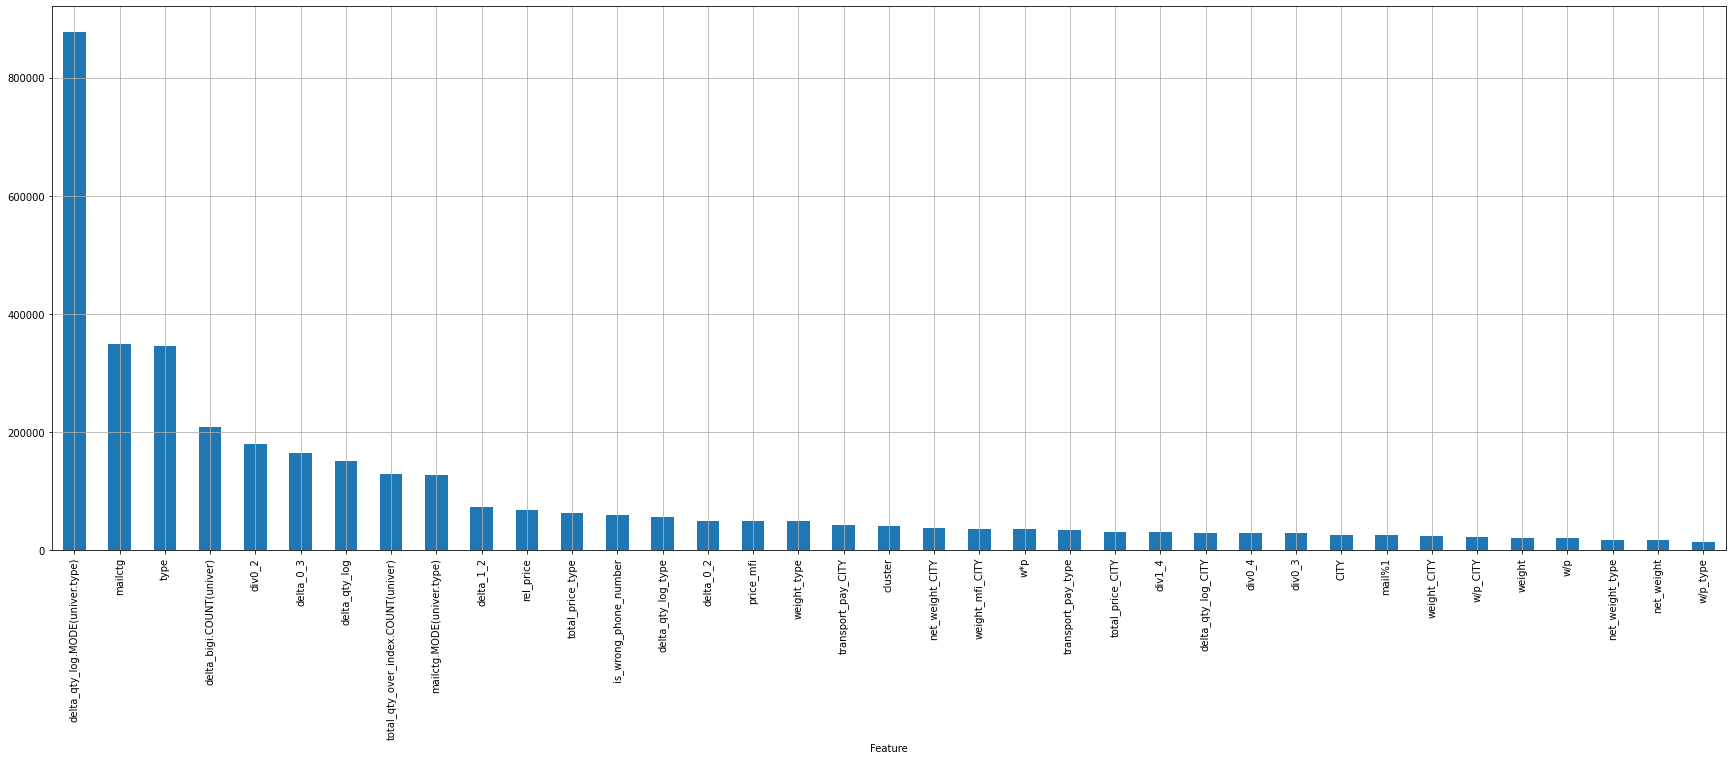

In [24]:
%%time

# Fast feature importances calculation
fast_fi = automl2.get_feature_scores('fast')
fast_fi.set_index('Feature')['Importance'].plot.bar(figsize = (30, 10), grid = True)

In [38]:
fast_fi.Feature.values

array(['delta_qty_log.MODE(univer.type)', 'mailctg', 'type',
       'delta_bigi.COUNT(univer)', 'div0_2', 'delta_0_3', 'delta_qty_log',
       'total_qty_over_index.COUNT(univer)', 'mailctg.MODE(univer.type)',
       'delta_1_2', 'rel_price', 'total_price_type',
       'is_wrong_phone_number', 'delta_qty_log_type', 'delta_0_2',
       'price_mfi', 'weight_type', 'transport_pay_CITY', 'cluster',
       'net_weight_CITY', 'weight_mfi_CITY', 'w*p', 'transport_pay_type',
       'total_price_CITY', 'div1_4', 'delta_qty_log_CITY', 'div0_4',
       'div0_3', 'CITY', 'mail%1', 'weight_CITY', 'w/p_CITY', 'weight',
       'w/p', 'net_weight_type', 'net_weight', 'w/p_type'], dtype=object)

In [25]:
#import joblib

#joblib.dump(automl2, 'model_13_all_opa.pkl')

In [30]:
te_pred = automl2.predict(big_train)
from sklearn.metrics import roc_auc_score
roc_auc_score(te_data['label'].values,te_pred.data[:,0])

NameError: name 'te_data' is not defined

In [40]:
from sklearn.metrics import f1_score,recall_score,precision_score,accuracy_score

metric = pd.DataFrame(columns = ['alpha','precision','recall','f1','accuracy','roc_auc','macro_recall','ovo_auc'])

for x in np.array(list(range(20)))/100 :#for x in [0.02,0.025,0.0275,0.03,0.0325,0.035,0.0375,0.04]:
    row = []
    tr = te_data['label'].values
    pr = 1*(te_pred.data[:,0] >= x)
    row.append(x)

    row.append(precision_score(te_data['label'].values ,pr))
    row.append(recall_score(te_data['label'].values ,pr))
    row.append(f1_score(te_data['label'].values ,pr))
    row.append(accuracy_score(te_data['label'].values ,pr))
    

    fp = np.sum((pr == 1) & (tr == 0))
    tp = np.sum((pr == 1) & (tr == 1))

    fn = np.sum((pr == 0) & (tr == 1))
    tn = np.sum((pr == 0) & (tr == 0))

    fpr = (fp / (fp + tn))
    tpr = (tp / (tp + fn))

    roc = (1+ tpr - fpr)/2 


    row.append(roc)
    row.append(recall_score(te_data['label'].values ,pr, average = "macro" ))
    row.append(roc_auc_score(te_data['label'].values ,pr, multi_class='ovo'))

    metric.loc[len(metric.index)] = row



In [ ]:
metric

In [25]:
end_test_pred = automl2.predict(big_test)

In [26]:
end_test_pred

array([[0.00890295],
       [0.19188966],
       [0.08457791],
       ...,
       [0.00041095],
       [0.00455387],
       [0.02755348]], dtype=float32)

In [27]:

sum(1*(end_test_pred.data[:,0] >= 0.03))

385988

In [28]:

submission = pd.DataFrame(columns = ['id','label'])
submission['id'] = big_test['id'].values
submission['label'] = 1*(end_test_pred.data[:,0] >= 0.03)

In [29]:


submission['label'].value_counts()
submission.to_csv('submission_15_003_pred_1.csv',index = False)

In [44]:
all_df = pd.read_csv('./all_big.csv')[['id','op_t','op_a']]

In [45]:
tr_p = all_df[:6000000]
te_p = all_df[6000000:]

<AxesSubplot:xlabel='op_a', ylabel='count'>

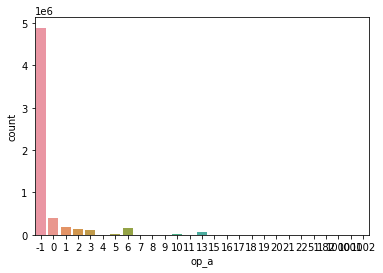

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

sns.countplot(x = "op_a" , data  = tr_p) 

# END PART 2

In [4]:
big_df = pd.read_csv('./big_df.csv')

In [5]:
#del big_df

In [6]:
N_THREADS = 32
N_FOLDS = 5
RANDOM_STATE = 42
TEST_SIZE = 0.2
TIMEOUT = 900*4*2 # equal to 15*4 minutes
TARGET_NAME = 'label'

In [7]:
np.random.seed(RANDOM_STATE)
torch.set_num_threads(N_THREADS)

In [8]:
big_df['net_weight'] = (big_df['weight'] - big_df['weight_mfi'])
big_df['total_price'] = (big_df['price_mfi'] + big_df['transport_pay'])

big_df['w/p'] = np.log(big_df['weight_mfi'] + 1) - np.log(big_df['price_mfi']+1)

big_df['post_days'] = pd.to_datetime('2020-11-1') - pd.to_datetime(big_df['ACTDATE'])
big_df['post_days'] = big_df['post_days'].apply(lambda x: x.days)


big_df['delta_log1'] = np.log(big_df['total_qty_oper_login_1']+1) - np.log(big_df['dist_qty_oper_login_1']+1)

big_df['delta_qty_log'] = (big_df['total_qty_oper_login_1'] - big_df['total_qty_oper_login_0'])

big_df['delta_bigi'] = (big_df['total_qty_over_index'] - big_df['total_qty_over_index_and_type'])

def num_tov(x):
    if x == '0' or x=='':
        return 0
    else:
        return x.count(',')+1
    

big_df['num_prod'] = big_df['name_mfi'].apply(num_tov)

In [9]:
tr_clust = pd.read_csv('./train_clusters.csv')

In [10]:
big_df['cluster'] = tr_clust['cluster']

# NLP

In [11]:
def rem_br(x):
    l_b = x.find('(')
    r_b = x.find(')')
    while l_b != -1:
        if len(x) -1 != r_b:
            if l_b == -1:
                continue
            elif r_b == -1:
                x = x[:l_b]
            elif l_b>r_b:
                x = x[:r_b]+x[r_b+1:]
            elif r_b != -1 and l_b < r_b:
                x = x[:l_b] + x[r_b+1:]

        else:
            x = x[:l_b]
        l_b = x.find('(')
        r_b = x.find(')')
    return x

def rem_br2(x):
    l_b = x.find('[')
    r_b = x.find(']')
    while l_b != -1:
        if len(x) -1 != r_b:
            if r_b != -1:
                x = x[:l_b] + x[r_b+1:]
            else:
                x = x[:l_b]
        else:
            x = x[:l_b]
        l_b = x.find('[')
        r_b = x.find(']')
    return x

In [12]:
a_col = big_df['name_mfi'].apply(rem_br).apply(rem_br2)

In [13]:
big_df['name_mfi'] = a_col

In [14]:
!pip install gensim

In [15]:
import pandas as pd
import numpy as np
import pickle

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from lightautoml.automl.presets.text_presets import TabularNLPAutoML
from lightautoml.tasks import Task
from lightautoml.addons.interpretation import LimeTextExplainer
from lightautoml.report import ReportDecoNLP

# Выключим предупреждения от HuggingFace
import transformers
transformers.logging.set_verbosity(50)

In [16]:
tr_data, te_data = train_test_split(
    big_df.drop(['Unnamed: 0','oper_type + oper_attr','ACTDATE','is_privatecategory','is_in_yandex','mailtype','is_wrong_sndr_name','is_wrong_address','is_return','priority','directctg','class','is_wrong_rcpn_name','index_oper','new_index_oper','OPSSUBM','op_t','op_a'],axis = 1), 
    test_size=TEST_SIZE, 
    random_state=RANDOM_STATE
)

print(f'Data splitted. Parts sizes: tr_data = {tr_data.shape}, te_data = {te_data.shape}')

tr_data.head()

Data splitted. Parts sizes: tr_data = (4800000, 28), te_data = (1200000, 28)


,id,type,weight,mailctg,mailrank,transport_pay,postmark,name_mfi,weight_mfi,price_mfi,dist_qty_oper_login_1,total_qty_oper_login_1,total_qty_oper_login_0,total_qty_over_index_and_type,total_qty_over_index,is_wrong_phone_number,label,CITY,AREA,net_weight,total_price,w/p,post_days,delta_log1,delta_qty_log,delta_bigi,num_prod,cluster
3604976,4619089,П,141.0,1.0,0.0,22.59,0.0,Blocks,37.0,190.0,7.0,72206.0,7646.0,79852.0,1110354.0,1,0,КЛИНЦЫ,БРЯНСКАЯ ОБЛАСТЬ,104.0,212.59,-1.614687,4777.0,9.107851,64560.0,1030502.0,1,15
5936295,1004170,Участок,736.0,1.0,0.0,50.12,0.0,Slippers,520.0,300.0,15.0,487093.0,147547.0,634640.0,4821535.0,0,0,ЕЛИЗОВО,КАМЧАТСКИЙ КРАЙ,216.0,350.12,0.548640,977.0,10.323624,339546.0,4186895.0,1,0
1804115,2569448,ММПО,175.0,0.0,0.0,0.00,0.0,Mobile Phone Cases & Covers,80.0,100.0,972.0,68766046.0,91123247.0,159889293.0,164927295.0,1,1,ШАРАПОВО,МОСКВА,95.0,100.00,-0.220671,213.0,11.165837,-22357201.0,5038002.0,1,23
4351206,5506132,Участок,753.0,1.0,0.0,50.81,0.0,rhinestone,1.0,7.0,27.0,9164121.0,4770841.0,13934962.0,14030822.0,1,0,ЕКАТЕРИНБУРГ,СВЕРДЛОВСКАЯ ОБЛАСТЬ,752.0,57.81,-1.386294,2568.0,12.698602,4393280.0,95860.0,1,0
5014389,727375,Цех,1138.0,1.0,0.0,68.54,0.0,Jewelry Findings & Components,10.0,380.0,186.0,60613352.0,10648.0,60624000.0,75592387.0,0,0,ШАРАПОВО,МОСКВА,1128.0,448.54,-3.544904,213.0,12.688917,60602704.0,14968387.0,1,13


In [ ]:
roles = {'target': TARGET_NAME,
         'text': ['name_mfi'],
             
        'drop': ['id']}

task = Task('binary', loss = 'logloss', metric = 'auc')

automl = TabularNLPAutoML(task = task, 
                          timeout = 3600*2,
                          gpu_ids = '1',
                          reader_params = {'n_jobs': N_THREADS, 'cv': N_FOLDS, 'random_state': RANDOM_STATE},
                          text_params = {'lang': 'en'},
                          nn_params = {'lang': 'en'},)
                          #verbose=2)

#oof_pred = automl.fit_predict(train, roles=roles) 
#not_nan = np.any(~np.isnan(oof_pred.data), axis=1)

In [ ]:
del big_df

In [ ]:
del tr_clust

In [ ]:
%%time 
oof_pred = automl.fit_predict(tr_data, roles = roles,verbose=2)
not_nan = np.any(~np.isnan(oof_pred.data), axis=1)

In [ ]:
5

# END NLP

In [17]:
!pip install featuretools

In [18]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import featuretools as ft
from featuretools.primitives import *


from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression, LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import explained_variance_score
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel, SelectKBest, RFE, chi2

# model tuning
#from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval

import warnings
warnings.filterwarnings("ignore")

# Feature generation

In [19]:
main_cols = ['id','transport_pay','type','mailctg','total_qty_oper_login_0','total_qty_oper_login_1','total_qty_over_index','delta_qty_log','delta_bigi','delta_log1']

In [20]:
gen_df = big_df[main_cols]

In [21]:
from woodwork.logical_types import Categorical, Double, Integer
es = ft.EntitySet()
es = es.add_dataframe(
    dataframe_name="univer",
    dataframe=gen_df,
    index="id",
    logical_types=   {
                                  'transport_pay': Double,
                                    'type': Categorical,
                                    'mailctg': Categorical,
                               
                                    'total_qty_oper_login_0':Double,
                                    'total_qty_oper_login_1':Double,
                                    'total_qty_over_index': Double,
                                    'delta_qty_log':Double,
                                    'delta_bigi':Double,
                                    'delta_log1':Double


                              }
)


In [22]:
es = es.normalize_dataframe(base_dataframe_name='univer', new_dataframe_name='transport_pay', index='transport_pay')
es = es.normalize_dataframe(base_dataframe_name='univer', new_dataframe_name='type', index='type')
es = es.normalize_dataframe(base_dataframe_name='univer', new_dataframe_name='mailctg', index='mailctg')
es = es.normalize_dataframe(base_dataframe_name='univer', new_dataframe_name='total_qty_oper_login_0', index='total_qty_oper_login_0')
es = es.normalize_dataframe(base_dataframe_name='univer', new_dataframe_name='total_qty_oper_login_1', index='total_qty_oper_login_1')
es = es.normalize_dataframe(base_dataframe_name='univer', new_dataframe_name='total_qty_over_index', index='total_qty_over_index')
es = es.normalize_dataframe(base_dataframe_name='univer', new_dataframe_name='delta_qty_log', index='delta_qty_log')
es = es.normalize_dataframe(base_dataframe_name='univer', new_dataframe_name='delta_bigi', index='delta_bigi')
es = es.normalize_dataframe(base_dataframe_name='univer', new_dataframe_name='delta_log1', index='delta_log1')

#es = es.normalize_dataframe(base_dataframe_name='univer', new_dataframe_name='tr_count_группы', index='tr_count_группы')
es

Entityset: None
  DataFrames:
    univer [Rows: 6000000, Columns: 10]
    transport_pay [Rows: 10412, Columns: 1]
    type [Rows: 20, Columns: 1]
    mailctg [Rows: 5, Columns: 1]
    total_qty_oper_login_0 [Rows: 9351, Columns: 1]
    total_qty_oper_login_1 [Rows: 18377, Columns: 1]
    total_qty_over_index [Rows: 35188, Columns: 1]
    delta_qty_log [Rows: 17027, Columns: 1]
    delta_bigi [Rows: 34707, Columns: 1]
    delta_log1 [Rows: 24601, Columns: 1]
  Relationships:
    univer.transport_pay -> transport_pay.transport_pay
    univer.type -> type.type
    univer.mailctg -> mailctg.mailctg
    univer.total_qty_oper_login_0 -> total_qty_oper_login_0.total_qty_oper_login_0
    univer.total_qty_oper_login_1 -> total_qty_oper_login_1.total_qty_oper_login_1
    univer.total_qty_over_index -> total_qty_over_index.total_qty_over_index
    univer.delta_qty_log -> delta_qty_log.delta_qty_log
    univer.delta_bigi -> delta_bigi.delta_bigi
    univer.delta_log1 -> delta_log1.delta_log1

In [23]:
primitives = ft.list_primitives()
pd.options.display.max_colwidth = 100
primitives[primitives['type'] == 'aggregation'].head(primitives[primitives['type'] == 'aggregation'].shape[0])

,name,type,dask_compatible,spark_compatible,description,valid_inputs,return_type
0,last,aggregation,False,False,Determines the last value in a list.,<ColumnSchema>,None
1,avg_time_between,aggregation,False,False,Computes the average number of seconds between consecutive events.,<ColumnSchema (Logical Type = Datetime) (Semantic Tags = ['time_index'])>,<ColumnSchema (Logical Type = Double) (Semantic Tags = ['numeric'])>
2,count_less_than,aggregation,False,False,Determines the number of values less than a controllable threshold.,<ColumnSchema (Semantic Tags = ['numeric'])>,<ColumnSchema (Logical Type = Integer) (Semantic Tags = ['numeric'])>
3,num_true,aggregation,True,False,Counts the number of `True` values.,"<ColumnSchema (Logical Type = BooleanNullable)>, <ColumnSchema (Logical Type = Boolean)>",<ColumnSchema (Logical Type = IntegerNullable) (Semantic Tags = ['numeric'])>
4,count_above_mean,aggregation,False,False,Calculates the number of values that are above the mean.,<ColumnSchema (Semantic Tags = ['numeric'])>,<ColumnSchema (Logical Type = IntegerNullable) (Semantic Tags = ['numeric'])>
5,time_since_last,aggregation,False,False,Calculates the time elapsed since the last datetime (default in seconds).,<ColumnSchema (Logical Type = Datetime) (Semantic Tags = ['time_index'])>,<ColumnSchema (Logical Type = Double) (Semantic Tags = ['numeric'])>
6,mode,aggregation,False,False,Determines the most commonly repeated value.,<ColumnSchema (Semantic Tags = ['category'])>,None
7,mean,aggregation,True,True,Computes the average for a list of values.,<ColumnSchema (Semantic Tags = ['numeric'])>,<ColumnSchema (Semantic Tags = ['numeric'])>
8,median,aggregation,False,False,Determines the middlemost number in a list of values.,<ColumnSchema (Semantic Tags = ['numeric'])>,<ColumnSchema (Semantic Tags = ['numeric'])>
9,all,aggregation,True,False,Calculates if all values are 'True' in a list.,"<ColumnSchema (Logical Type = BooleanNullable)>, <ColumnSchema (Logical Type = Boolean)>",<ColumnSchema (Logical Type = Boolean)>


In [24]:
#features, feature_names = ft.dfs(entityset = es, 
#                                 target_dataframe_name = 'univer', 
#                                 max_depth = 3)
default_agg_primitives =  [ "std",  "skew", "mean", "count", "percent_true", "num_unique", "mode"]

features, feature_names = ft.dfs(entityset = es, target_dataframe_name = 'univer',
                                       
                                       agg_primitives=default_agg_primitives, 
                                        max_depth = 2, features_only=False, verbose = True)



len(feature_names)

Built 50 features

Elapsed: 04:58 | Progress: 100%|██████████


50

In [25]:
features.columns

Index(['transport_pay', 'type', 'mailctg', 'total_qty_oper_login_0',
       'total_qty_oper_login_1', 'total_qty_over_index', 'delta_qty_log',
       'delta_bigi', 'delta_log1', 'transport_pay.COUNT(univer)',
       'transport_pay.MODE(univer.mailctg)', 'transport_pay.MODE(univer.type)',
       'transport_pay.NUM_UNIQUE(univer.mailctg)',
       'transport_pay.NUM_UNIQUE(univer.type)', 'type.COUNT(univer)',
       'type.MODE(univer.mailctg)', 'type.NUM_UNIQUE(univer.mailctg)',
       'mailctg.COUNT(univer)', 'mailctg.MODE(univer.type)',
       'mailctg.NUM_UNIQUE(univer.type)',
       'total_qty_oper_login_0.COUNT(univer)',
       'total_qty_oper_login_0.MODE(univer.mailctg)',
       'total_qty_oper_login_0.MODE(univer.type)',
       'total_qty_oper_login_0.NUM_UNIQUE(univer.mailctg)',
       'total_qty_oper_login_0.NUM_UNIQUE(univer.type)',
       'total_qty_oper_login_1.COUNT(univer)',
       'total_qty_oper_login_1.MODE(univer.mailctg)',
       'total_qty_oper_login_1.MODE(univer.typ

In [26]:
big_gen_df = pd.concat([big_df,features.reset_index()[['transport_pay.COUNT(univer)',
       'transport_pay.MODE(univer.mailctg)', 'transport_pay.MODE(univer.type)',
       'transport_pay.NUM_UNIQUE(univer.mailctg)',
       'transport_pay.NUM_UNIQUE(univer.type)', 'type.COUNT(univer)',
       'type.MODE(univer.mailctg)', 'type.NUM_UNIQUE(univer.mailctg)',
       'mailctg.COUNT(univer)', 'mailctg.MODE(univer.type)',
       'mailctg.NUM_UNIQUE(univer.type)',
       'total_qty_oper_login_0.COUNT(univer)',
       'total_qty_oper_login_0.MODE(univer.mailctg)',
       'total_qty_oper_login_0.MODE(univer.type)',
       'total_qty_oper_login_0.NUM_UNIQUE(univer.mailctg)',
       'total_qty_oper_login_0.NUM_UNIQUE(univer.type)',
       'total_qty_oper_login_1.COUNT(univer)',
       'total_qty_oper_login_1.MODE(univer.mailctg)',
       'total_qty_oper_login_1.MODE(univer.type)',
       'total_qty_oper_login_1.NUM_UNIQUE(univer.mailctg)',
       'total_qty_oper_login_1.NUM_UNIQUE(univer.type)',
       'total_qty_over_index.COUNT(univer)',
       'total_qty_over_index.MODE(univer.mailctg)',
       'total_qty_over_index.MODE(univer.type)',
       'total_qty_over_index.NUM_UNIQUE(univer.mailctg)',
       'total_qty_over_index.NUM_UNIQUE(univer.type)',
       'delta_qty_log.COUNT(univer)', 'delta_qty_log.MODE(univer.mailctg)',
       'delta_qty_log.MODE(univer.type)',
       'delta_qty_log.NUM_UNIQUE(univer.mailctg)',
       'delta_qty_log.NUM_UNIQUE(univer.type)', 'delta_bigi.COUNT(univer)',
       'delta_bigi.MODE(univer.mailctg)', 'delta_bigi.MODE(univer.type)',
       'delta_bigi.NUM_UNIQUE(univer.mailctg)',
       'delta_bigi.NUM_UNIQUE(univer.type)', 'delta_log1.COUNT(univer)',
       'delta_log1.MODE(univer.mailctg)', 'delta_log1.MODE(univer.type)',
       'delta_log1.NUM_UNIQUE(univer.mailctg)',
       'delta_log1.NUM_UNIQUE(univer.type)']]],axis = 1)

In [27]:
big_gen_df

,Unnamed: 0,id,oper_type + oper_attr,index_oper,type,priority,is_privatecategory,class,is_in_yandex,is_return,weight,mailtype,mailctg,mailrank,directctg,transport_pay,postmark,name_mfi,weight_mfi,price_mfi,dist_qty_oper_login_1,total_qty_oper_login_1,total_qty_oper_login_0,total_qty_over_index_and_type,total_qty_over_index,is_wrong_sndr_name,is_wrong_rcpn_name,is_wrong_phone_number,is_wrong_address,label,op_t,op_a,new_index_oper,OPSSUBM,CITY,ACTDATE,AREA,net_weight,total_price,w/p,post_days,delta_log1,delta_qty_log,delta_bigi,num_prod,cluster,transport_pay.COUNT(univer),transport_pay.MODE(univer.mailctg),transport_pay.MODE(univer.type),transport_pay.NUM_UNIQUE(univer.mailctg),transport_pay.NUM_UNIQUE(univer.type),type.COUNT(univer),type.MODE(univer.mailctg),type.NUM_UNIQUE(univer.mailctg),mailctg.COUNT(univer),mailctg.MODE(univer.type),mailctg.NUM_UNIQUE(univer.type),total_qty_oper_login_0.COUNT(univer),total_qty_oper_login_0.MODE(univer.mailctg),total_qty_oper_login_0.MODE(univer.type),total_qty_oper_login_0.NUM_UNIQUE(univer.mailctg),total_qty_oper_login_0.NUM_UNIQUE(univer.type),total_qty_oper_login_1.COUNT(univer),total_qty_oper_login_1.MODE(univer.mailctg),total_qty_oper_login_1.MODE(univer.type),total_qty_oper_login_1.NUM_UNIQUE(univer.mailctg),total_qty_oper_login_1.NUM_UNIQUE(univer.type),total_qty_over_index.COUNT(univer),total_qty_over_index.MODE(univer.mailctg),total_qty_over_index.MODE(univer.type),total_qty_over_index.NUM_UNIQUE(univer.mailctg),total_qty_over_index.NUM_UNIQUE(univer.type),delta_qty_log.COUNT(univer),delta_qty_log.MODE(univer.mailctg),delta_qty_log.MODE(univer.type),delta_qty_log.NUM_UNIQUE(univer.mailctg),delta_qty_log.NUM_UNIQUE(univer.type),delta_bigi.COUNT(univer),delta_bigi.MODE(univer.mailctg),delta_bigi.MODE(univer.type),delta_bigi.NUM_UNIQUE(univer.mailctg),delta_bigi.NUM_UNIQUE(univer.type),delta_log1.COUNT(univer),delta_log1.MODE(univer.mailctg),delta_log1.MODE(univer.type),delta_log1.NUM_UNIQUE(univer.mailctg),delta_log1.NUM_UNIQUE(univer.type)
0,0,6818780,1043_-1,628629,Участок,7503.0,N,0.0,2,0,87.0,5.0,1.0,0.0,2.0,0.00,0.0,"Fishhook,USB",41.0,150.0,42.0,720176.0,58950.0,779126.0,8290896.0,0,0,0,0,0,1043,-1,628629,628600,НИЖНЕВАРТОВСК,2017-09-06,ХАНТЫ-МАНСИЙСКИЙ-ЮГРА АВТОНОМНЫЙ ОКРУГ,46.0,150.00,-1.279610,1152.0,9.726052,661226.0,7511770.0,2,22,4120507,1.0,Цех,4,20,926631,1.0,5,4688317,Цех,20,1986,1.0,Участок,3,1,1986,1.0,Участок,3,1,1986,1.0,Участок,3,1,1986,1.0,Участок,3,1,1986,1.0,Участок,3,1,1986,1.0,Участок,3,1
1,1,9907176,1023_-1,102976,ММПО,7503.0,N,0.0,1,0,107.0,5.0,1.0,0.0,2.0,0.00,0.0,"screen protector,Case,case",68.0,400.0,914.0,48856658.0,83318932.0,132175590.0,136819803.0,0,0,0,0,0,1023,-1,102976,102975,ШАРАПОВО,2020-04-02,МОСКВА,39.0,400.00,-1.759855,213.0,10.885477,-34462274.0,4644213.0,3,3,4120507,1.0,Цех,4,20,1614974,1.0,4,4688317,Цех,20,795886,1.0,ММПО,2,1,795886,1.0,ММПО,2,1,795886,1.0,ММПО,2,1,795886,1.0,ММПО,2,1,795886,1.0,ММПО,2,1,795886,1.0,ММПО,2,1
2,2,3304275,1018_-1,620962,Цех,7503.0,N,0.0,2,0,50.0,5.0,1.0,0.0,2.0,0.00,0.0,"Pendant Necklaces,Rings for Women,Necklaces",56.0,218.0,62.0,3246292.0,3233068.0,6479360.0,52708071.0,0,1,0,0,0,1018,-1,620962,620960,ЕКАТЕРИНБУРГ,2010-06-18,СВЕРДЛОВСКАЯ ОБЛАСТЬ,-6.0,218.00,-1.346020,3789.0,10.849890,13224.0,46228711.0,3,14,4120507,1.0,Цех,4,20,2093668,1.0,4,4688317,Цех,20,26680,1.0,Цех,1,1,26680,1.0,Цех,1,1,26687,1.0,Цех,2,1,26680,1.0,Цех,1,1,26680,1.0,Цех,1,1,26680,1.0,Цех,1,1
3,3,9020937,1019_-1,344964,Цех,7503.0,N,0.0,2,0,416.0,5.0,1.0,0.0,2.0,35.34,0.0,Motorcycle Signal Lamp,33.0,100.0,55.0,2060928.0,653280.0,2714208.0,19562334.0,0,0,0,0,0,1019,-1,344964,344960,РОСТОВ-НА-ДОНУ,2010-06-18,РОСТОВСКАЯ ОБЛАСТЬ,383.0,135.34,-1.088760,3789.0,10.513316,1407648.0,16848126.0,1,26,1100,1.0,Цех,1,10,2093668,1.0,4,4688317,Цех,20,2387,1.0,Цех,2,1,2387,1.0,Цех,2,1,2387,1.0,Цех,2,1,2387,1.0,Цех,2,1,2387,1.0,Цех,2,1,2387,1.0,Цех,2,1
4,4,3082311,1020_-1,629819,Участок,7503.0,N,0.0,2,0,795.0,5.0,1.0,0.0,2.0,52.52,0.0,backpack,716.0,1000.

In [28]:
del tr_clust

In [29]:
del big_df


In [30]:
tr_data, te_data = train_test_split(
    big_gen_df.drop(['Unnamed: 0','oper_type + oper_attr','ACTDATE','is_privatecategory','is_in_yandex','mailtype','is_wrong_sndr_name','is_wrong_address','is_return','priority','directctg','class','is_wrong_rcpn_name','index_oper','new_index_oper','OPSSUBM','op_t','op_a'],axis = 1), 
    test_size=TEST_SIZE, 
    random_state=RANDOM_STATE
)

print(f'Data splitted. Parts sizes: tr_data = {tr_data.shape}, te_data = {te_data.shape}')

tr_data.head()

Data splitted. Parts sizes: tr_data = (4800000, 69), te_data = (1200000, 69)


,id,type,weight,mailctg,mailrank,transport_pay,postmark,name_mfi,weight_mfi,price_mfi,dist_qty_oper_login_1,total_qty_oper_login_1,total_qty_oper_login_0,total_qty_over_index_and_type,total_qty_over_index,is_wrong_phone_number,label,CITY,AREA,net_weight,total_price,w/p,post_days,delta_log1,delta_qty_log,delta_bigi,num_prod,cluster,transport_pay.COUNT(univer),transport_pay.MODE(univer.mailctg),transport_pay.MODE(univer.type),transport_pay.NUM_UNIQUE(univer.mailctg),transport_pay.NUM_UNIQUE(univer.type),type.COUNT(univer),type.MODE(univer.mailctg),type.NUM_UNIQUE(univer.mailctg),mailctg.COUNT(univer),mailctg.MODE(univer.type),mailctg.NUM_UNIQUE(univer.type),total_qty_oper_login_0.COUNT(univer),total_qty_oper_login_0.MODE(univer.mailctg),total_qty_oper_login_0.MODE(univer.type),total_qty_oper_login_0.NUM_UNIQUE(univer.mailctg),total_qty_oper_login_0.NUM_UNIQUE(univer.type),total_qty_oper_login_1.COUNT(univer),total_qty_oper_login_1.MODE(univer.mailctg),total_qty_oper_login_1.MODE(univer.type),total_qty_oper_login_1.NUM_UNIQUE(univer.mailctg),total_qty_oper_login_1.NUM_UNIQUE(univer.type),total_qty_over_index.COUNT(univer),total_qty_over_index.MODE(univer.mailctg),total_qty_over_index.MODE(univer.type),total_qty_over_index.NUM_UNIQUE(univer.mailctg),total_qty_over_index.NUM_UNIQUE(univer.type),delta_qty_log.COUNT(univer),delta_qty_log.MODE(univer.mailctg),delta_qty_log.MODE(univer.type),delta_qty_log.NUM_UNIQUE(univer.mailctg),delta_qty_log.NUM_UNIQUE(univer.type),delta_bigi.COUNT(univer),delta_bigi.MODE(univer.mailctg),delta_bigi.MODE(univer.type),delta_bigi.NUM_UNIQUE(univer.mailctg),delta_bigi.NUM_UNIQUE(univer.type),delta_log1.COUNT(univer),delta_log1.MODE(univer.mailctg),delta_log1.MODE(univer.type),delta_log1.NUM_UNIQUE(univer.mailctg),delta_log1.NUM_UNIQUE(univer.type)
3604976,4619089,П,141.0,1.0,0.0,22.59,0.0,Blocks,37.0,190.0,7.0,72206.0,7646.0,79852.0,1110354.0,1,0,КЛИНЦЫ,БРЯНСКАЯ ОБЛАСТЬ,104.0,212.59,-1.614687,4777.0,9.107851,64560.0,1030502.0,1,15,3309,1.0,Цех,1,12,245814,1.0,4,4688317,Цех,20,242,1.0,Участок,1,2,116,1.0,П,1,1,116,1.0,П,1,1,116,1.0,П,1,1,116,1.0,П,1,1,116,1.0,П,1,1
5936295,1004170,Участок,736.0,1.0,0.0,50.12,0.0,Slippers,520.0,300.0,15.0,487093.0,147547.0,634640.0,4821535.0,0,0,ЕЛИЗОВО,КАМЧАТСКИЙ КРАЙ,216.0,350.12,0.548640,977.0,10.323624,339546.0,4186895.0,1,0,501,1.0,Цех,1,8,926631,1.0,5,4688317,Цех,20,2882,1.0,Участок,2,1,2882,1.0,Участок,2,1,2882,1.0,Участок,2,1,2882,1.0,Участок,2,1,2882,1.0,Участок,2,1,2882,1.0,Участок,2,1
1804115,2569448,ММПО,175.0,0.0,0.0,0.00,0.0,Mobile Phone Cases & Covers,80.0,100.0,972.0,68766046.0,91123247.0,159889293.0,164927295.0,1,1,ШАРАПОВО,МОСКВА,95.0,100.00,-0.220671,213.0,11.165837,-22357201.0,5038002.0,1,23,4120507,1.0,Цех,4,20,1614974,1.0,4,1257102,ММПО,20,272750,1.0,ММПО,3,1,272750,1.0,ММПО,3,1,272795,1.0,ММПО,3,1,272750,1.0,ММПО,3,1,272750,1.0,ММПО,3,1,272750,1.0,ММПО,3,1
4351206,5506132,Участок,753.0,1.0,0.0,50.81,0.0,rhinestone,1.0,7.0,27.0,9164121.0,4770841.0,13934962.0,14030822.0,1,0,ЕКАТЕРИНБУРГ,СВЕРДЛОВСКАЯ ОБЛАСТЬ,752.0,57.81,-1.386294,2568.0,12.698602,4393280.0,95860.0,1,0,378,1.0,Цех,1,6,926631,1.0,5,4688317,Цех,20,83464,1.0,Участок,2,1,83464,1.0,Участок,2,1,83464,1.0,Участок,2,1,83464,1.0,Участок,2,1,83464,1.0,Участок,2,1,83464,1.0,Участок,2,1
5014389,727375,Цех,1138.0,1.0,0.0,68.54,0.0,Jewelry Findings & Components,10.0,380.0,186.0,60613352.0,10648.0,60624000.0,75592387.0,0,0,ШАРАПОВО,МОСКВА,1128.0,448.54,-3.544904,213.0,12.688917,60602704.0,14968387.0,1,13,337,1.0,Цех,1,7,2093668,1.0,4,4688317,Цех,20,147112,1.0,Цех,2,1,147112,1.0,Цех,2,1,147112,1.0,Цех,2,1,147112,1.0,Цех,2,1,147112,1.0,Цех,2,1,147112,1.0,Цех,2,1


In [31]:
task = Task('binary', loss = 'logloss', metric = 'auc')

In [32]:
roles = {
    'target': TARGET_NAME,
    'drop': ['id']
}

In [33]:

automl = TabularAutoML(
    task = task, 
    timeout = 3600+1800,
    cpu_limit = N_THREADS,
    reader_params = {'n_jobs': N_THREADS, 'cv': N_FOLDS, 'random_state': RANDOM_STATE}
    #general_params = {'use_algos': [['cb','cb_tuned']]},
    #selection_params = {'mode': 0}
    
)

In [34]:
tr_data.drop(['name_mfi'],axis = 1,inplace = True)

In [ ]:
%%time 
oof_pred = automl.fit_predict(tr_data, roles = roles, verbose = 1)

[23:38:55] Stdout logging level is INFO.

[23:38:55] Copying TaskTimer may affect the parent PipelineTimer, so copy will create new unlimited TaskTimer

[23:38:55] Task: binary



[23:38:55] Start automl preset with listed constraints:

[23:38:55] - time: 5400.00 seconds

[23:38:55] - CPU: 32 cores

[23:38:55] - memory: 16 GB



[23:38:55] Train data shape: (4800000, 68)




/usr/local/lib/python3.9/dist-packages/lightautoml/transformers/categorical.py:1029: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

  cnts = cnts.append(Series([cnts.shape[0] + 1], index=[np.nan]))

/usr/local/lib/python3.9/dist-packages/lightautoml/transformers/categorical.py:1029: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

  cnts = cnts.append(Series([cnts.shape[0] + 1], index=[np.nan]))

/usr/local/lib/python3.9/dist-packages/lightautoml/transformers/categorical.py:1029: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

  cnts = cnts.append(Series([cnts.shape[0] + 1], index=[np.nan]))

/usr/local/lib/python3.9/dist-packages/lightautoml/transformers/categorical.py:1029: FutureWarning: The series.append method is deprecated 

[23:39:25] Layer 1 train process start. Time left 5370.38 secs

[23:45:30] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...

[23:52:09] Time limit exceeded after calculating fold 1



[23:52:09] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = 0.9129872225452329

[23:52:09] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed

[23:52:09] Time left 4605.48 secs



[23:55:55] Selector_LightGBM fitting and predicting completed

[00:02:42] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...

[00:10:32] Time limit exceeded after calculating fold 2



[00:10:33] Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = 0.9521564869654353

[00:10:33] Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed

[00:10:33] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ... Time budget is 1.00 secs

[00:11:54] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM completed

[00:11:54] Start fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ...

[00:33:05] Fitting 

Default metric period is 5 because AUC is/are not implemented for GPU

Default metric period is 5 because AUC is/are not implemented for GPU


[00:40:12] Time limit exceeded after calculating fold 1



[00:40:13] Fitting Lvl_0_Pipe_1_Mod_2_CatBoost finished. score = 0.9510400611882655

[00:40:13] Lvl_0_Pipe_1_Mod_2_CatBoost fitting and predicting completed

[00:40:13] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ... Time budget is 1.00 secs


Default metric period is 5 because AUC is/are not implemented for GPU


[00:43:42] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost completed

[00:43:42] Start fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ...


Default metric period is 5 because AUC is/are not implemented for GPU

Default metric period is 5 because AUC is/are not implemented for GPU

Default metric period is 5 because AUC is/are not implemented for GPU

Default metric period is 5 because AUC is/are not implemented for GPU

Default metric period is 5 because AUC is/are not implemented for GPU


In [ ]:
56

# End Fetures Generation

In [20]:
task = Task('binary', loss = 'logloss', metric = 'auc')

In [21]:
roles = {
    'target': TARGET_NAME,
    'drop': ['id']
}

In [22]:
TIMEOUT = 900*4

In [23]:
automl = TabularAutoML(
    task = task, 
    timeout = TIMEOUT,
    cpu_limit = N_THREADS,
    reader_params = {'n_jobs': N_THREADS, 'cv': N_FOLDS, 'random_state': RANDOM_STATE}
    #general_params = {'use_algos': [['cb','cb_tuned']]},
    #selection_params = {'mode': 0}
    
)

In [24]:
%%time 
oof_pred = automl.fit_predict(tr_data, roles = roles, verbose = 1)

[09:56:52] Stdout logging level is INFO.

[09:56:52] Copying TaskTimer may affect the parent PipelineTimer, so copy will create new unlimited TaskTimer

[09:56:52] Task: binary



[09:56:52] Start automl preset with listed constraints:

[09:56:52] - time: 3600.00 seconds

[09:56:52] - CPU: 32 cores

[09:56:52] - memory: 16 GB



[09:56:52] Train data shape: (4800000, 27)



[09:57:08] Layer 1 train process start. Time left 3583.89 secs

[10:01:49] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...

[10:05:45] Time limit exceeded after calculating fold 3



[10:05:47] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = 0.9116411636922224

[10:05:47] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed

[10:05:47] Time left 3064.93 secs



[10:13:34] Selector_LightGBM fitting and predicting completed

[10:18:56] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...

[10:23:48] Time limit exceeded after calculating fold 0



[10:23:48] Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = 0.

Default metric period is 5 because AUC is/are not implemented for GPU

Default metric period is 5 because AUC is/are not implemented for GPU


[10:33:26] Time limit exceeded after calculating fold 1



[10:33:27] Fitting Lvl_0_Pipe_1_Mod_2_CatBoost finished. score = 0.9501357313160363

[10:33:27] Lvl_0_Pipe_1_Mod_2_CatBoost fitting and predicting completed

[10:33:27] Time left 1404.91 secs



[10:33:27] Time limit exceeded in one of the tasks. AutoML will blend level 1 models.



[10:33:27] Layer 1 training completed.



[10:33:28] Blending: optimization starts with equal weights and score 0.930655325463523

[10:33:48] Blending: iteration 0: score = 0.9518737941558284, weights = [0. 1. 0.]

[10:34:03] Blending: iteration 1: score = 0.9518737941558284, weights = [0. 1. 0.]

[10:34:03] Blending: no score update. Terminated



[10:34:04] Automl preset training completed in 2232.12 seconds



[10:34:04] Model description:

Final prediction for new objects (level 0) = 

	 1.00000 * (1 averaged models Lvl_0_Pipe_1_Mod_0_LightGBM) 



CPU times: user 54min 28s, sys: 4min 48s, total: 59min 16s

Wall time: 37min 12s


CPU times: user 145 ms, sys: 53.3 ms, total: 198 ms

Wall time: 202 ms


<AxesSubplot:xlabel='Feature'>

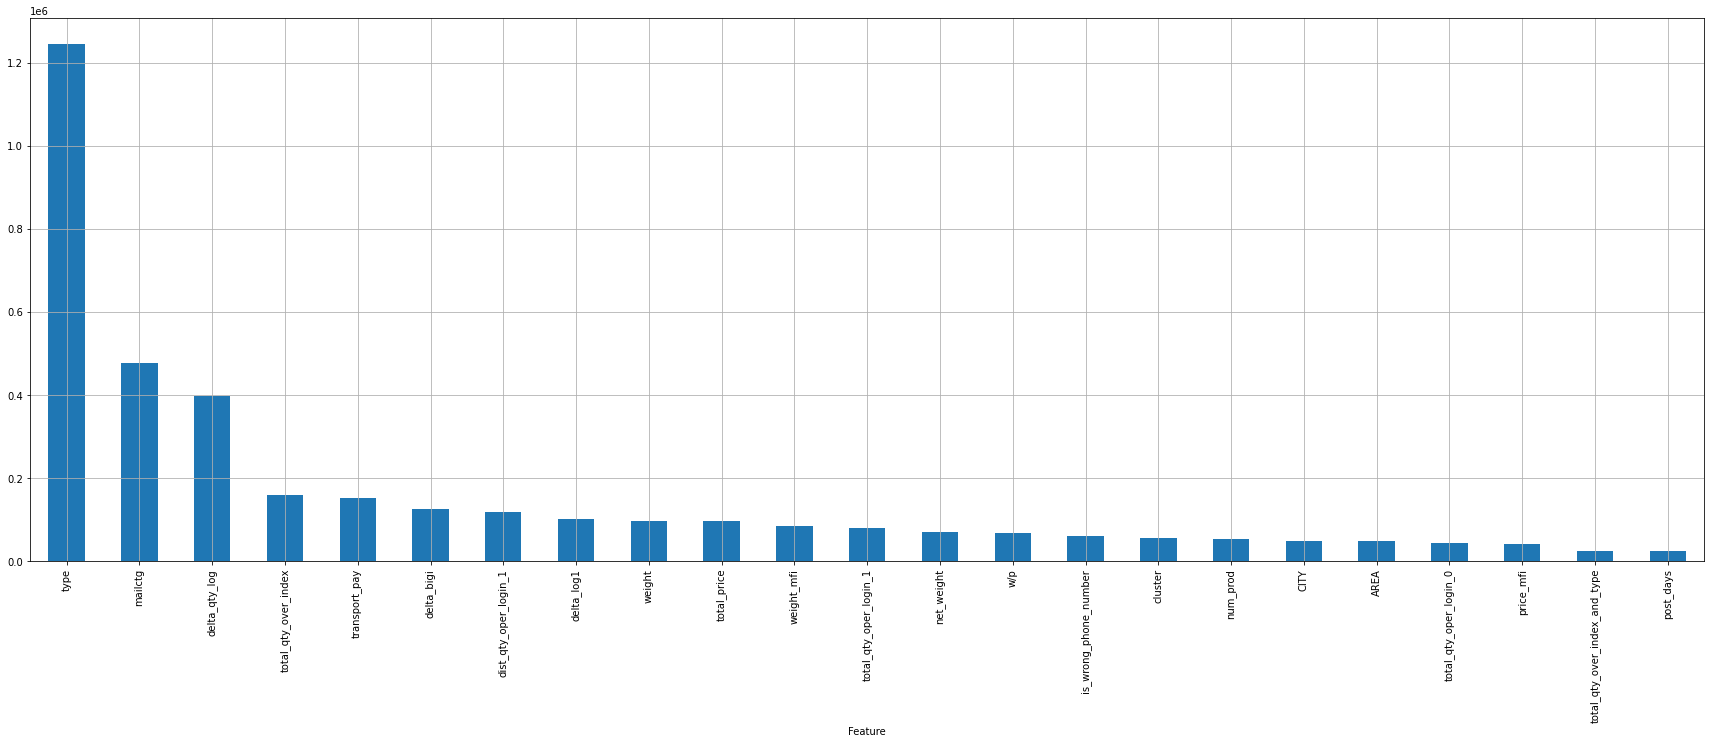

In [25]:
%%time

# Fast feature importances calculation
fast_fi = automl.get_feature_scores('fast')
fast_fi.set_index('Feature')['Importance'].plot.bar(figsize = (30, 10), grid = True)

CPU times: user 108 ms, sys: 25.6 ms, total: 134 ms

Wall time: 206 ms


<AxesSubplot:xlabel='Feature'>

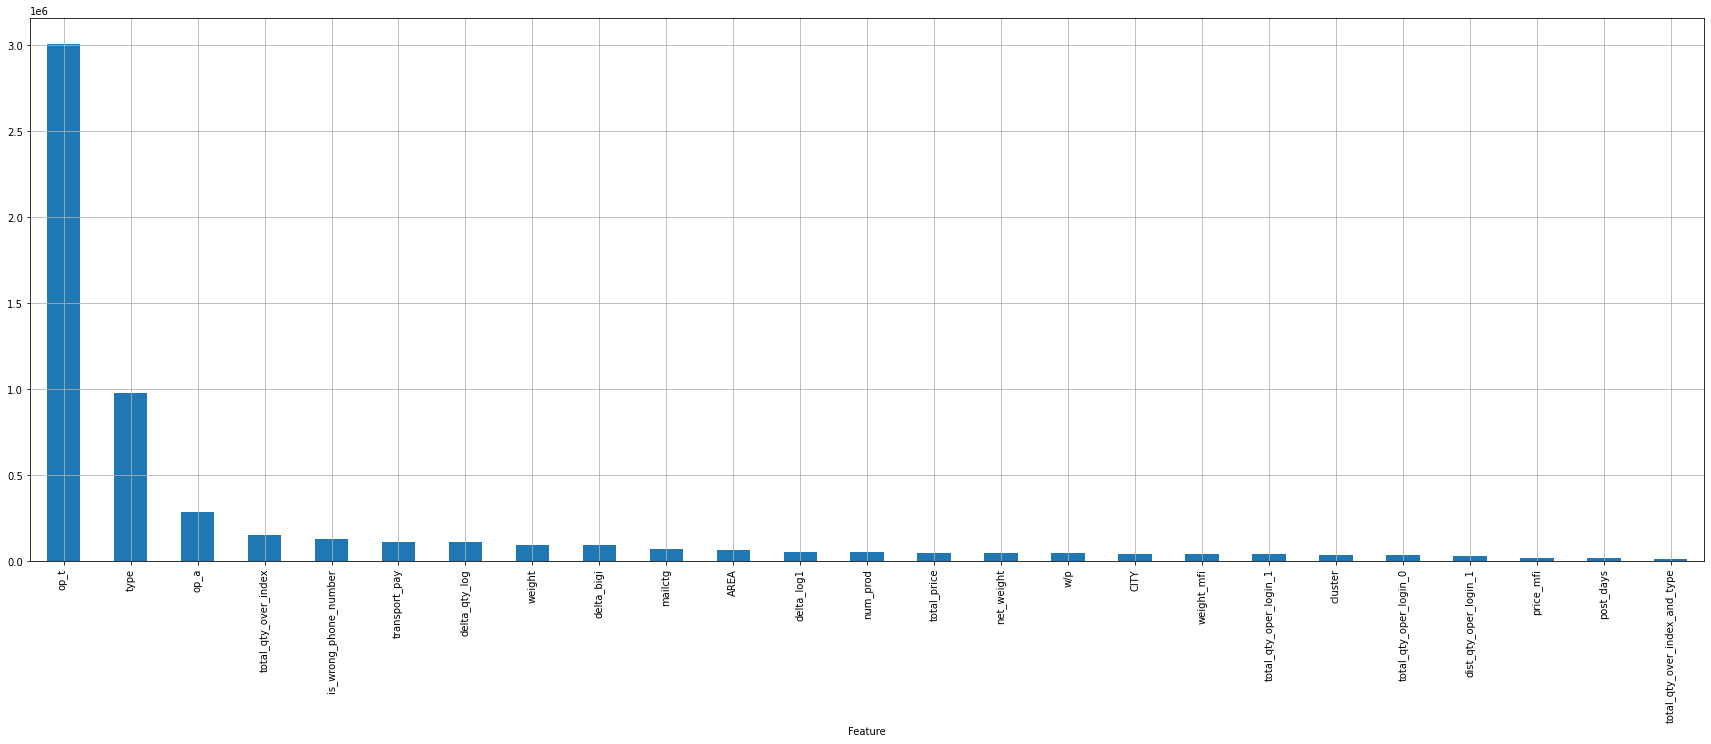

In [28]:
%%time

# Fast feature importances calculation
fast_fi = automl.get_feature_scores('fast')
fast_fi.set_index('Feature')['Importance'].plot.bar(figsize = (30, 10), grid = True)

In [26]:
import joblib

joblib.dump(automl, 'model_911_bez1.pkl')

['model_911_bez1.pkl']

In [27]:
te_pred = automl.predict(te_data)

In [28]:
from sklearn.metrics import roc_auc_score

In [30]:
roc_auc_score(te_data['label'].values,te_pred.data[:,0])

0.95171376087469

In [31]:
from sklearn.metrics import f1_score,recall_score,precision_score,accuracy_score

In [32]:


metric = pd.DataFrame(columns = ['alpha','precision','recall','f1','accuracy','roc_auc','macro_recall','ovo_auc'])

for x in np.array(list(range(20)))/100 :
    row = []
    tr = te_data['label'].values
    pr = 1*(te_pred.data[:,0] >= x)
    row.append(x)

    row.append(precision_score(te_data['label'].values ,pr))
    row.append(recall_score(te_data['label'].values ,pr))
    row.append(f1_score(te_data['label'].values ,pr))
    row.append(accuracy_score(te_data['label'].values ,pr))
    

    fp = np.sum((pr == 1) & (tr == 0))
    tp = np.sum((pr == 1) & (tr == 1))

    fn = np.sum((pr == 0) & (tr == 1))
    tn = np.sum((pr == 0) & (tr == 0))

    fpr = (fp / (fp + tn))
    tpr = (tp / (tp + fn))

    roc = (1+ tpr - fpr)/2 


    row.append(roc)
    row.append(recall_score(te_data['label'].values ,pr, average = "macro" ))
    row.append(roc_auc_score(te_data['label'].values ,pr, multi_class='ovo'))

    metric.loc[len(metric.index)] = row



In [34]:
metric

,alpha,precision,recall,f1,accuracy,roc_auc,macro_recall,ovo_auc
0,0.00,0.028608,1.000000,0.055625,0.028608,0.500000,0.500000,0.500000
1,0.01,0.106733,0.981620,0.192531,0.764446,0.869835,0.869835,0.869835
2,0.02,0.128839,0.960559,0.227204,0.813063,0.884639,0.884639,0.884639
3,0.03,0.140055,0.944800,0.243948,0.832461,0.886976,0.886976,0.886976
4,0.04,0.154252,0.919837,0.264199,0.853424,0.885653,0.885653,0.885653
5,0.05,0.171805,0.885028,0.287751,0.874658,0.879690,0.879690,0.879690
6,0.06,0.195567,0.840518,0.317306,0.896529,0.869349,0.869349,0.869349
7,0.07,0.218367,0.797000,0.342810,0.912578,0.856491,0.856491,0.856491
8,0.08,0.242219,0.759161,0.367259,0.925164,0.844607,0.844607,0.844607
9,0.09,0.262324,0.726828,0.385511,0.933712,0.833317,0.833317,0.833317


In [35]:
def op_t(x):
    return x[:x.find('_')]
def op_a(x):
    return x[x.find('_')+1:]

In [36]:
qq =  pd.read_csv('./PIndx20.csv')
qq['index_oper'] = qq['INDEX'].values



def p_to_int(x):
    if type(x) == float:
        return int(x)
    return x[:x.find('.')]

#df['index_oper'] = df['index_oper'].apply(p_to_int)
def nd(x):
    if x == '':
        return 0
    x = int(x)
    if x // 10**5 >0:
        return 6
    elif x // 10**4 >0:
        return 5
    elif x // 10**3 >0:
        return 4

def from5t6(x):
    if x == '':
        return 0
    x = int(x)
    if x // 10**5 == 0:
        return x*10
    return x

In [37]:
test_df = pd.read_csv('./test_dataset_test.csv')
test_df["is_in_yandex"] = pd.Categorical(test_df["is_in_yandex"])
test_df["is_in_yandex"].astype('category').cat.codes
test_df["is_in_yandex"] = test_df["is_in_yandex"].cat.codes

test_df["is_return"] = pd.Categorical(test_df["is_return"])
test_df["is_return"].astype('category').cat.codes
test_df["is_return"] = test_df["is_return"].cat.codes

test_df['op_t'] = test_df['oper_type + oper_attr'].apply(op_t).astype('int64')
test_df['op_a'] = test_df['oper_type + oper_attr'].apply(op_a).astype('int64')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [38]:
test_df['index_oper'] = test_df['index_oper'].apply(p_to_int)


pld2 = pd.DataFrame(columns = ['index_oper','new_index_oper','OPSSUBM','REGION','AUTONOM','CITY','ACTDATE'])
pld = pd.DataFrame(columns = ['index_oper','new_index_oper'])
pld['index_oper'] = test_df['index_oper'].values
pld2['index_oper'] = test_df['index_oper'].values
qq['new_index_oper'] = qq['INDEX'].values

for i in range(10):
    def from5t6(x):
        if x == '':
            return 0
        x = int(float(x))
        if x // 10**5 == 0:
            return x*10 + i
        return x
    pld['new_index_oper'] = pld['index_oper'].apply(from5t6)
    pld2['new_index_oper'] = pld2['index_oper'].apply(from5t6)
    
    pz = pd.merge(pld, qq[['new_index_oper','OPSSUBM','REGION','AUTONOM','CITY','ACTDATE']],how = 'left', on="new_index_oper")
    
    pld['index_oper'][pz['ACTDATE'].isna() == False]['index_oper'] = pz[pz['ACTDATE'].isna() == False]['new_index_oper'].values
    pld2['index_oper'][pz['ACTDATE'].isna() == False]['index_oper'] = pz[pz['ACTDATE'].isna() == False]['new_index_oper'].values
    #pld[['OPSSUBM','REGION','AUTONOM','CITY','ACTDATE']] = pz[pz['ACTDATE'].isna() == False][['OPSSUBM','REGION','AUTONOM','CITY','ACTDATE']].values
    pld2.loc[pz['ACTDATE'].isna() == False,['OPSSUBM','REGION','AUTONOM','CITY','ACTDATE']] = pz[pz['ACTDATE'].isna() == False][['OPSSUBM','REGION','AUTONOM','CITY','ACTDATE']].values


pld2['AREA'] = (pld2['REGION'].fillna('') + pld2['AUTONOM'].fillna('')).values
pld2.drop(['REGION','AUTONOM'],axis = 1,inplace = True)
pld2.loc[pld2['AREA'] == 'МОСКВА','CITY'] = pld2[pld2['AREA'] == 'МОСКВА']['CITY'].fillna('МОСКВА').values

big_test_df = pd.concat([test_df,pld2.drop(['index_oper'],axis=1)],axis = 1)
big_test_df['ACTDATE'] = pd.to_datetime(big_test_df['ACTDATE'])


def npust(x):
    if x == '':
        return 0
    return int(x)

    
big_test_df['index_oper'] = big_test_df['index_oper'].apply(npust)
big_test_df['new_index_oper'] = big_test_df['new_index_oper'].apply(npust)
big_test_df['OPSSUBM'] = big_test_df['OPSSUBM'].fillna(0).apply(npust)

big_test_df['net_weight'] = (big_test_df['weight'] - big_test_df['weight_mfi'])
big_test_df['total_price'] = (big_test_df['price_mfi'] + big_test_df['transport_pay'])

big_test_df['w/p'] = np.log(big_test_df['weight_mfi'] + 1) - np.log(big_test_df['price_mfi']+1)

big_test_df['post_days'] = pd.to_datetime('2020-11-1') - pd.to_datetime(big_test_df['ACTDATE'])
big_test_df['post_days'] = big_test_df['post_days'].apply(lambda x: x.days)


big_test_df['delta_log1'] = np.log(big_test_df['total_qty_oper_login_1']+1) - np.log(big_test_df['dist_qty_oper_login_1']+1)

big_test_df['delta_qty_log'] = (big_test_df['total_qty_oper_login_1'] - big_test_df['total_qty_oper_login_0'])

big_test_df['delta_bigi'] = (big_test_df['total_qty_over_index'] - big_test_df['total_qty_over_index_and_type'])

def num_tov(x):
    if x == '0' or x=='':
        return 0
    else:
        return x.count(',')+1
    

big_test_df['num_prod'] = big_test_df['name_mfi'].apply(num_tov)

In [39]:
5*8

40

In [40]:
del tr_data

In [41]:
test_cluster = pd.read_csv('./test_clusters.csv')

In [42]:
big_test_df['cluster'] = test_cluster['cluster'].values

In [43]:
del test_cluster

In [44]:
big_test_df['op_t'] = big_test_df['oper_type + oper_attr'].apply(op_t).astype('int64')
big_test_df['op_a'] = big_test_df['oper_type + oper_attr'].apply(op_a).astype('int64')

In [45]:
big_test_df.drop(['name_mfi','oper_type + oper_attr','ACTDATE','is_privatecategory','is_in_yandex','mailtype','is_wrong_sndr_name','is_wrong_address','is_return','priority','directctg','class','is_wrong_rcpn_name','index_oper','new_index_oper','OPSSUBM'],axis = 1,inplace = True)

In [46]:
end_test_pred = automl.predict(big_test_df)

In [47]:
end_test_pred

array([[7.9575159e-02],
       [2.0653152e-01],
       [3.0362045e-02],
       ...,
       [1.7602635e-05],
       [3.0337245e-05],
       [7.1519311e-03]], dtype=float32)

In [52]:
sum(1*(end_test_pred.data[:,0] >= 0.05))

588018

In [53]:
submission = pd.DataFrame(columns = ['id','label'])
submission['id'] = test_df['id'].values
submission['label'] = 1*(end_test_pred.data[:,0] >= 0.05)


In [54]:
submission['label'].value_counts()

0    3411982
1     588018
Name: label, dtype: int64

In [55]:
submission.to_csv('submission_9_11_05_2.csv',index = False)

# Special

In [57]:
automl.get_feature_scores('fast')

,Feature,Importance
0,type,1.245929e+06
1,mailctg,4.767929e+05
2,delta_qty_log,3.977020e+05
3,total_qty_over_index,1.602480e+05
4,transport_pay,1.517017e+05
5,delta_bigi,1.270496e+05
6,dist_qty_oper_login_1,1.182451e+05
7,delta_log1,1.006862e+05
8,weight,9.752177e+04
9,total_price,9.648345e+04


# NLP hahahahahhahah